<a href="https://colab.research.google.com/github/hoon0gim/ganproject/blob/main/project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt
import glob
from glob import glob
import cv2
import os
print(os.getcwd())


/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_list = glob('/content/drive/MyDrive/id_dataset/id dataset/*.jpg')
print(data_list[:])

['/content/drive/MyDrive/id_dataset/id dataset/id (1224).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1035).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1034).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1033).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1041).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1032).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1031).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1037).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1030).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1029).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1028).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1027).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1026).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1025).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1024).jpg', '/content/drive/MyDrive/id_dataset/id dataset/id (1023).jpg', '/conte

In [ ]:
data_height = 256
data_width = 256
batch_size = len(data_list)

In [ ]:
def make_file(data_height, data_width, batch_size):
    images = np.zeros((batch_size, data_height, data_width))
    for n, path in enumerate(data_list[:batch_size]):
        
    # image transform
        image = cv2.imread(data_list[n], 0)
        image = cv2.resize(image, (data_height, data_width), interpolation=cv2.INTER_LINEAR)/255
        images[n, :, :] =image
        
    return images

In [ ]:
X_train = make_file(data_height, data_width, batch_size)

In [ ]:
X_train[1]

array([[0.3254902 , 0.3254902 , 0.3254902 , ..., 0.3372549 , 0.3372549 ,
        0.3372549 ],
       [0.3254902 , 0.3254902 , 0.3254902 , ..., 0.34117647, 0.34117647,
        0.3372549 ],
       [0.3254902 , 0.3254902 , 0.3254902 , ..., 0.34509804, 0.34509804,
        0.34509804],
       ...,
       [0.25882353, 0.25882353, 0.25882353, ..., 0.29803922, 0.29803922,
        0.29803922],
       [0.25490196, 0.25490196, 0.25490196, ..., 0.29803922, 0.29803922,
        0.29803922],
       [0.25490196, 0.25490196, 0.25490196, ..., 0.29411765, 0.29411765,
        0.29411765]])

In [ ]:
generator = Sequential()
generator.add(Dense(128*64*64, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((64,64,128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

In [ ]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(256,256,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable=False

In [ ]:
ginput = Input(shape=(100,))

dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 1)       55256961  
                                                                 
 sequential_1 (Sequential)   (None, 1)                 730881    
                                                                 
Total params: 55,987,842
Trainable params: 54,208,257
Non-trainable params: 1,779,585
_________________________________________________________________


epoch:0 d_loss:0.7479 g_loss:0.0292


<Figure size 720x576 with 0 Axes>

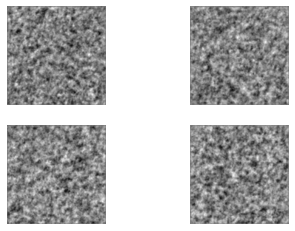

epoch:1 d_loss:0.1649 g_loss:26.8667
epoch:2 d_loss:2.6392 g_loss:82.6841
epoch:3 d_loss:0.1800 g_loss:86.4015
epoch:4 d_loss:0.2080 g_loss:75.8069
epoch:5 d_loss:0.0014 g_loss:44.9397
epoch:6 d_loss:0.0000 g_loss:5.7285
epoch:7 d_loss:0.0000 g_loss:0.0000
epoch:8 d_loss:0.0000 g_loss:0.0000
epoch:9 d_loss:0.0001 g_loss:10.3013
epoch:10 d_loss:0.8767 g_loss:12.4374
epoch:11 d_loss:0.6812 g_loss:23.5691
epoch:12 d_loss:0.1048 g_loss:29.5108
epoch:13 d_loss:0.2001 g_loss:24.3351
epoch:14 d_loss:0.0000 g_loss:2.6985
epoch:15 d_loss:0.0000 g_loss:0.0000
epoch:16 d_loss:0.8537 g_loss:0.0000
epoch:17 d_loss:3.1492 g_loss:0.0000
epoch:18 d_loss:0.3732 g_loss:0.0000
epoch:19 d_loss:0.0502 g_loss:0.0000
epoch:20 d_loss:0.0978 g_loss:17.9586
epoch:21 d_loss:0.3860 g_loss:0.0000
epoch:22 d_loss:4.6621 g_loss:15.7124
epoch:23 d_loss:11.0184 g_loss:0.0000
epoch:24 d_loss:8.8306 g_loss:0.0000
epoch:25 d_loss:1.5695 g_loss:15.0366
epoch:26 d_loss:8.0414 g_loss:3.5464
epoch:27 d_loss:7.8086 g_loss:0.0

<Figure size 720x576 with 0 Axes>

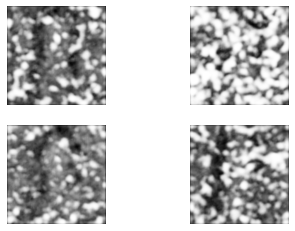

epoch:51 d_loss:1.3943 g_loss:4.3037
epoch:52 d_loss:1.3287 g_loss:5.1127
epoch:53 d_loss:1.9489 g_loss:3.3018
epoch:54 d_loss:1.9016 g_loss:2.6271
epoch:55 d_loss:1.6096 g_loss:6.4791
epoch:56 d_loss:1.1261 g_loss:7.3178
epoch:57 d_loss:1.1806 g_loss:9.1505
epoch:58 d_loss:0.5496 g_loss:13.0823
epoch:59 d_loss:0.9154 g_loss:10.1145
epoch:60 d_loss:0.7070 g_loss:8.3448
epoch:61 d_loss:0.8224 g_loss:4.9993
epoch:62 d_loss:0.9573 g_loss:2.2573
epoch:63 d_loss:0.9080 g_loss:2.2757
epoch:64 d_loss:0.8609 g_loss:1.6440
epoch:65 d_loss:0.8625 g_loss:2.1845
epoch:66 d_loss:0.6052 g_loss:2.4064
epoch:67 d_loss:0.6685 g_loss:2.0835
epoch:68 d_loss:0.4131 g_loss:3.5492
epoch:69 d_loss:0.3691 g_loss:3.2571
epoch:70 d_loss:0.4083 g_loss:3.3171
epoch:71 d_loss:0.2704 g_loss:3.6009
epoch:72 d_loss:0.2585 g_loss:3.8463
epoch:73 d_loss:0.2154 g_loss:3.9213
epoch:74 d_loss:0.2367 g_loss:3.5997
epoch:75 d_loss:0.1941 g_loss:3.6538
epoch:76 d_loss:0.1342 g_loss:3.7360
epoch:77 d_loss:0.2486 g_loss:2.6270

<Figure size 720x576 with 0 Axes>

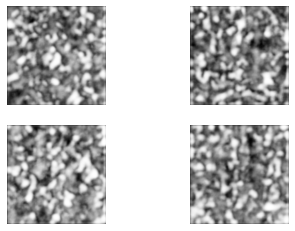

epoch:101 d_loss:0.4203 g_loss:5.3409
epoch:102 d_loss:0.2495 g_loss:5.9229
epoch:103 d_loss:0.5025 g_loss:4.0477
epoch:104 d_loss:0.2228 g_loss:5.5978
epoch:105 d_loss:0.3153 g_loss:4.5380
epoch:106 d_loss:0.1554 g_loss:4.9009
epoch:107 d_loss:0.2645 g_loss:4.4219
epoch:108 d_loss:0.3394 g_loss:3.7850
epoch:109 d_loss:0.1272 g_loss:4.8372
epoch:110 d_loss:0.5502 g_loss:2.4759
epoch:111 d_loss:0.0562 g_loss:6.5252
epoch:112 d_loss:0.4355 g_loss:0.3149
epoch:113 d_loss:0.5342 g_loss:7.1733
epoch:114 d_loss:0.4697 g_loss:9.3152
epoch:115 d_loss:0.8502 g_loss:0.0196
epoch:116 d_loss:1.9312 g_loss:4.2052
epoch:117 d_loss:0.2056 g_loss:17.6111
epoch:118 d_loss:2.3643 g_loss:6.7705
epoch:119 d_loss:0.6926 g_loss:0.1506
epoch:120 d_loss:0.7528 g_loss:4.8102
epoch:121 d_loss:0.2066 g_loss:13.3687
epoch:122 d_loss:1.2768 g_loss:4.8046
epoch:123 d_loss:0.3960 g_loss:0.1556
epoch:124 d_loss:0.4967 g_loss:3.4109
epoch:125 d_loss:0.1024 g_loss:10.8749
epoch:126 d_loss:0.5179 g_loss:8.7469
epoch:127

<Figure size 720x576 with 0 Axes>

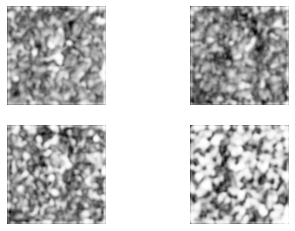

epoch:151 d_loss:0.0368 g_loss:1.1849
epoch:152 d_loss:0.0511 g_loss:1.1111
epoch:153 d_loss:0.0614 g_loss:0.6536
epoch:154 d_loss:0.0416 g_loss:0.7275
epoch:155 d_loss:0.0390 g_loss:1.2002
epoch:156 d_loss:0.0410 g_loss:1.3769
epoch:157 d_loss:0.0496 g_loss:0.7896
epoch:158 d_loss:0.0595 g_loss:0.4530
epoch:159 d_loss:0.0360 g_loss:0.6736
epoch:160 d_loss:0.0562 g_loss:0.9755
epoch:161 d_loss:0.0426 g_loss:1.0390
epoch:162 d_loss:0.0749 g_loss:0.3394
epoch:163 d_loss:0.0898 g_loss:0.5450
epoch:164 d_loss:0.0477 g_loss:1.7337
epoch:165 d_loss:0.1170 g_loss:0.4584
epoch:166 d_loss:0.1084 g_loss:0.1967
epoch:167 d_loss:0.0595 g_loss:0.7720
epoch:168 d_loss:0.0487 g_loss:1.0209
epoch:169 d_loss:0.1104 g_loss:0.1154
epoch:170 d_loss:0.0898 g_loss:0.3085
epoch:171 d_loss:0.0653 g_loss:1.2688
epoch:172 d_loss:0.1504 g_loss:0.0562
epoch:173 d_loss:0.1170 g_loss:0.2613
epoch:174 d_loss:0.0609 g_loss:0.7358
epoch:175 d_loss:0.1043 g_loss:0.0348
epoch:176 d_loss:0.1184 g_loss:0.2171
epoch:177 d_

<Figure size 720x576 with 0 Axes>

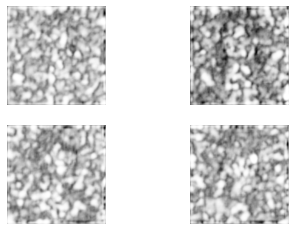

epoch:201 d_loss:0.0589 g_loss:3.0456
epoch:202 d_loss:0.0458 g_loss:4.9162
epoch:203 d_loss:0.1063 g_loss:4.3259
epoch:204 d_loss:0.0949 g_loss:2.4520
epoch:205 d_loss:0.0872 g_loss:1.1827
epoch:206 d_loss:0.1054 g_loss:1.5591
epoch:207 d_loss:0.0392 g_loss:3.1605
epoch:208 d_loss:0.0574 g_loss:4.1453
epoch:209 d_loss:0.0592 g_loss:3.8265
epoch:210 d_loss:0.0706 g_loss:2.3831
epoch:211 d_loss:0.1046 g_loss:1.4246
epoch:212 d_loss:0.0888 g_loss:2.1442
epoch:213 d_loss:0.0425 g_loss:3.7115
epoch:214 d_loss:0.0827 g_loss:3.7551
epoch:215 d_loss:0.0454 g_loss:3.1466
epoch:216 d_loss:0.0707 g_loss:2.3826
epoch:217 d_loss:0.1744 g_loss:1.5657
epoch:218 d_loss:0.1511 g_loss:3.0042
epoch:219 d_loss:0.0572 g_loss:5.1792
epoch:220 d_loss:0.2540 g_loss:2.2299
epoch:221 d_loss:0.2757 g_loss:1.3727
epoch:222 d_loss:0.1535 g_loss:3.2951
epoch:223 d_loss:0.1559 g_loss:4.0376
epoch:224 d_loss:0.3527 g_loss:1.2017
epoch:225 d_loss:0.2932 g_loss:2.4863
epoch:226 d_loss:0.0785 g_loss:6.7748
epoch:227 d_

<Figure size 720x576 with 0 Axes>

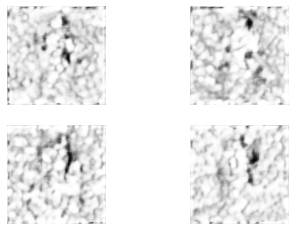

epoch:251 d_loss:0.1878 g_loss:3.2020
epoch:252 d_loss:0.0354 g_loss:4.5994
epoch:253 d_loss:0.1896 g_loss:2.6622
epoch:254 d_loss:0.0900 g_loss:2.6916
epoch:255 d_loss:0.0237 g_loss:3.8202
epoch:256 d_loss:0.0713 g_loss:1.4690
epoch:257 d_loss:0.0407 g_loss:3.1468
epoch:258 d_loss:0.0273 g_loss:4.7987
epoch:259 d_loss:0.0694 g_loss:0.9428
epoch:260 d_loss:0.1082 g_loss:6.7498
epoch:261 d_loss:0.0785 g_loss:14.1802
epoch:262 d_loss:0.4867 g_loss:0.1813
epoch:263 d_loss:1.9926 g_loss:15.1500
epoch:264 d_loss:0.4921 g_loss:43.5779
epoch:265 d_loss:5.6075 g_loss:20.2008
epoch:266 d_loss:0.9807 g_loss:0.0093
epoch:267 d_loss:5.8257 g_loss:5.4417
epoch:268 d_loss:0.0736 g_loss:21.4533
epoch:269 d_loss:0.7393 g_loss:22.4781
epoch:270 d_loss:0.5754 g_loss:0.0013
epoch:271 d_loss:16.1425 g_loss:30.7679
epoch:272 d_loss:1.5771 g_loss:32.7160
epoch:273 d_loss:13.7601 g_loss:47.3564
epoch:274 d_loss:3.9615 g_loss:62.7742
epoch:275 d_loss:6.3698 g_loss:2.9106
epoch:276 d_loss:13.8111 g_loss:5.7575

<Figure size 720x576 with 0 Axes>

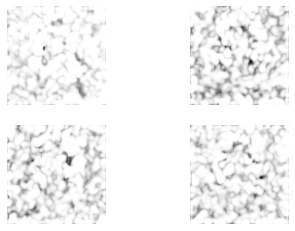

epoch:301 d_loss:3.8051 g_loss:149.3634
epoch:302 d_loss:12.9811 g_loss:119.9150
epoch:303 d_loss:8.6856 g_loss:37.4586
epoch:304 d_loss:1.7717 g_loss:13.1125
epoch:305 d_loss:0.4868 g_loss:37.5484
epoch:306 d_loss:0.5951 g_loss:46.8032
epoch:307 d_loss:1.7487 g_loss:29.4828
epoch:308 d_loss:0.3946 g_loss:8.1655
epoch:309 d_loss:3.3790 g_loss:50.1657
epoch:310 d_loss:0.9411 g_loss:134.4639
epoch:311 d_loss:11.0101 g_loss:106.7671
epoch:312 d_loss:6.0665 g_loss:60.8711
epoch:313 d_loss:2.3752 g_loss:22.2301
epoch:314 d_loss:0.2357 g_loss:0.4035
epoch:315 d_loss:5.4348 g_loss:11.6856
epoch:316 d_loss:0.0028 g_loss:33.3501
epoch:317 d_loss:1.8368 g_loss:38.3265
epoch:318 d_loss:2.1111 g_loss:33.8751
epoch:319 d_loss:1.4859 g_loss:22.3027
epoch:320 d_loss:0.4671 g_loss:7.0448
epoch:321 d_loss:1.8621 g_loss:7.3876
epoch:322 d_loss:0.3334 g_loss:16.9406
epoch:323 d_loss:0.8464 g_loss:18.8190
epoch:324 d_loss:0.3034 g_loss:17.2090
epoch:325 d_loss:0.8076 g_loss:13.6895
epoch:326 d_loss:0.3568

<Figure size 720x576 with 0 Axes>

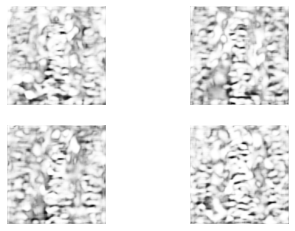

epoch:351 d_loss:0.0265 g_loss:17.6702
epoch:352 d_loss:0.2136 g_loss:22.4560
epoch:353 d_loss:0.0581 g_loss:23.7111
epoch:354 d_loss:0.2866 g_loss:18.1648
epoch:355 d_loss:0.0806 g_loss:10.2577
epoch:356 d_loss:0.0118 g_loss:5.6343
epoch:357 d_loss:0.2926 g_loss:5.5125
epoch:358 d_loss:0.1155 g_loss:11.0055
epoch:359 d_loss:0.0457 g_loss:16.0237
epoch:360 d_loss:0.0037 g_loss:18.8643
epoch:361 d_loss:0.0519 g_loss:18.6088
epoch:362 d_loss:0.2864 g_loss:11.7878
epoch:363 d_loss:0.3113 g_loss:4.8269
epoch:364 d_loss:0.3659 g_loss:6.6379
epoch:365 d_loss:0.0137 g_loss:17.8362
epoch:366 d_loss:0.4071 g_loss:15.4674
epoch:367 d_loss:0.3348 g_loss:6.4528
epoch:368 d_loss:0.6385 g_loss:4.1184
epoch:369 d_loss:0.2860 g_loss:13.1555
epoch:370 d_loss:0.6744 g_loss:8.5127
epoch:371 d_loss:0.6494 g_loss:1.0326
epoch:372 d_loss:0.0722 g_loss:0.1925
epoch:373 d_loss:0.0270 g_loss:0.0442
epoch:374 d_loss:0.0793 g_loss:0.1155
epoch:375 d_loss:0.1271 g_loss:0.1186
epoch:376 d_loss:0.0725 g_loss:0.0119

<Figure size 720x576 with 0 Axes>

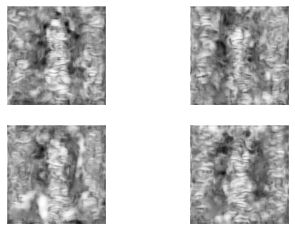

epoch:401 d_loss:0.7002 g_loss:0.8546
epoch:402 d_loss:0.3430 g_loss:8.4764
epoch:403 d_loss:3.0861 g_loss:2.6952
epoch:404 d_loss:4.8004 g_loss:0.0940
epoch:405 d_loss:3.5352 g_loss:2.7213
epoch:406 d_loss:1.5607 g_loss:6.2295
epoch:407 d_loss:2.3104 g_loss:1.3725
epoch:408 d_loss:1.4225 g_loss:2.3840
epoch:409 d_loss:0.2589 g_loss:6.7857
epoch:410 d_loss:0.6367 g_loss:5.7901
epoch:411 d_loss:0.2930 g_loss:2.1897
epoch:412 d_loss:0.5076 g_loss:4.0400
epoch:413 d_loss:0.0464 g_loss:10.4102
epoch:414 d_loss:0.3735 g_loss:12.2046
epoch:415 d_loss:0.6364 g_loss:9.1419
epoch:416 d_loss:0.4156 g_loss:3.1999
epoch:417 d_loss:0.5463 g_loss:3.1899
epoch:418 d_loss:0.1121 g_loss:6.5341
epoch:419 d_loss:0.3069 g_loss:7.4822
epoch:420 d_loss:0.3758 g_loss:5.2277
epoch:421 d_loss:0.2006 g_loss:2.3456
epoch:422 d_loss:0.4948 g_loss:2.0026
epoch:423 d_loss:0.1250 g_loss:4.3756
epoch:424 d_loss:0.1316 g_loss:6.3267
epoch:425 d_loss:0.2950 g_loss:5.8763
epoch:426 d_loss:0.4110 g_loss:3.5761
epoch:427 

<Figure size 720x576 with 0 Axes>

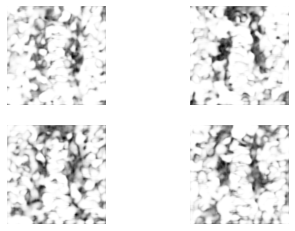

epoch:451 d_loss:2.3997 g_loss:14.4310
epoch:452 d_loss:1.2611 g_loss:5.9771
epoch:453 d_loss:0.3382 g_loss:1.1355
epoch:454 d_loss:1.3178 g_loss:3.0059
epoch:455 d_loss:0.1640 g_loss:9.5288
epoch:456 d_loss:0.2784 g_loss:12.6652
epoch:457 d_loss:0.3692 g_loss:13.3303
epoch:458 d_loss:0.7330 g_loss:10.9212
epoch:459 d_loss:0.3828 g_loss:7.1976
epoch:460 d_loss:0.8255 g_loss:4.7084
epoch:461 d_loss:0.4478 g_loss:4.9481
epoch:462 d_loss:0.1839 g_loss:6.8899
epoch:463 d_loss:0.4268 g_loss:6.8957
epoch:464 d_loss:0.3724 g_loss:5.2430
epoch:465 d_loss:0.2415 g_loss:3.8266
epoch:466 d_loss:0.4399 g_loss:3.5130
epoch:467 d_loss:0.3575 g_loss:4.3803
epoch:468 d_loss:0.1292 g_loss:6.0447
epoch:469 d_loss:0.3251 g_loss:5.5228
epoch:470 d_loss:0.5147 g_loss:3.6617
epoch:471 d_loss:0.4378 g_loss:4.1731
epoch:472 d_loss:0.2564 g_loss:6.5670
epoch:473 d_loss:0.5055 g_loss:6.6839
epoch:474 d_loss:0.5622 g_loss:4.7983
epoch:475 d_loss:0.3446 g_loss:4.3981
epoch:476 d_loss:0.1745 g_loss:5.8224
epoch:47

<Figure size 720x576 with 0 Axes>

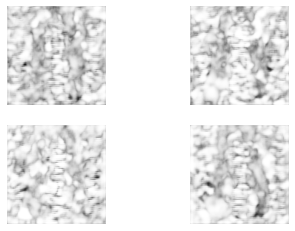

epoch:501 d_loss:0.0859 g_loss:6.6843
epoch:502 d_loss:0.1862 g_loss:7.2109
epoch:503 d_loss:0.2535 g_loss:5.9641
epoch:504 d_loss:0.3025 g_loss:4.6510
epoch:505 d_loss:0.5092 g_loss:4.9704
epoch:506 d_loss:0.7134 g_loss:5.6524
epoch:507 d_loss:0.3981 g_loss:6.7642
epoch:508 d_loss:0.5136 g_loss:7.3365
epoch:509 d_loss:0.3900 g_loss:8.0608
epoch:510 d_loss:0.3324 g_loss:8.2483
epoch:511 d_loss:0.3219 g_loss:8.2122
epoch:512 d_loss:0.2864 g_loss:7.1744
epoch:513 d_loss:0.3669 g_loss:7.5895
epoch:514 d_loss:0.3989 g_loss:8.2466
epoch:515 d_loss:0.1676 g_loss:11.1511
epoch:516 d_loss:0.2249 g_loss:12.5735
epoch:517 d_loss:0.1073 g_loss:10.3373
epoch:518 d_loss:0.1837 g_loss:6.1908
epoch:519 d_loss:0.1711 g_loss:5.2770
epoch:520 d_loss:0.0801 g_loss:7.0184
epoch:521 d_loss:0.1885 g_loss:5.2167
epoch:522 d_loss:0.2360 g_loss:3.2971
epoch:523 d_loss:0.1992 g_loss:5.0156
epoch:524 d_loss:0.3662 g_loss:3.6082
epoch:525 d_loss:0.2509 g_loss:3.7739
epoch:526 d_loss:0.2679 g_loss:3.7600
epoch:527

<Figure size 720x576 with 0 Axes>

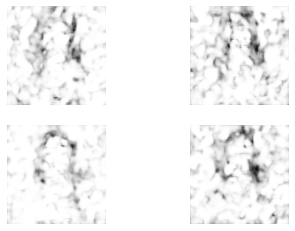

epoch:551 d_loss:0.0522 g_loss:3.8555
epoch:552 d_loss:0.0502 g_loss:4.6133
epoch:553 d_loss:0.0089 g_loss:6.8905
epoch:554 d_loss:0.0266 g_loss:6.0682
epoch:555 d_loss:0.0549 g_loss:3.2473
epoch:556 d_loss:0.0781 g_loss:6.1676
epoch:557 d_loss:0.0527 g_loss:8.9845
epoch:558 d_loss:0.1058 g_loss:4.3774
epoch:559 d_loss:0.0720 g_loss:3.4273
epoch:560 d_loss:0.0635 g_loss:4.1542
epoch:561 d_loss:0.0314 g_loss:4.7229
epoch:562 d_loss:0.0276 g_loss:4.1186
epoch:563 d_loss:0.0392 g_loss:3.6939
epoch:564 d_loss:0.0349 g_loss:4.4163
epoch:565 d_loss:0.0197 g_loss:5.9162
epoch:566 d_loss:0.0494 g_loss:5.2442
epoch:567 d_loss:0.0463 g_loss:4.0446
epoch:568 d_loss:0.0900 g_loss:4.8175
epoch:569 d_loss:0.1451 g_loss:4.8853
epoch:570 d_loss:0.0776 g_loss:4.6210
epoch:571 d_loss:0.0797 g_loss:4.3112
epoch:572 d_loss:0.1803 g_loss:6.4753
epoch:573 d_loss:0.0844 g_loss:5.9928
epoch:574 d_loss:0.2442 g_loss:4.2974
epoch:575 d_loss:0.0528 g_loss:6.3725
epoch:576 d_loss:0.1562 g_loss:3.8749
epoch:577 d_

<Figure size 720x576 with 0 Axes>

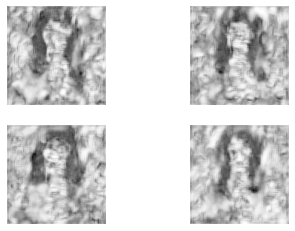

epoch:601 d_loss:0.1182 g_loss:3.4822
epoch:602 d_loss:0.1003 g_loss:4.2321
epoch:603 d_loss:0.1671 g_loss:3.6788
epoch:604 d_loss:0.0724 g_loss:3.9758
epoch:605 d_loss:0.1021 g_loss:3.8396
epoch:606 d_loss:0.1435 g_loss:3.9536
epoch:607 d_loss:0.2180 g_loss:3.2701
epoch:608 d_loss:0.0603 g_loss:5.1575
epoch:609 d_loss:0.2806 g_loss:1.9068
epoch:610 d_loss:0.2369 g_loss:4.6760
epoch:611 d_loss:0.1623 g_loss:5.3519
epoch:612 d_loss:0.1932 g_loss:1.9408
epoch:613 d_loss:0.2694 g_loss:4.7616
epoch:614 d_loss:0.1458 g_loss:7.2204
epoch:615 d_loss:0.4283 g_loss:0.6631
epoch:616 d_loss:0.9862 g_loss:3.7616
epoch:617 d_loss:0.1213 g_loss:11.2634
epoch:618 d_loss:2.1636 g_loss:2.0952
epoch:619 d_loss:0.7253 g_loss:0.4934
epoch:620 d_loss:0.4981 g_loss:1.7567
epoch:621 d_loss:0.1411 g_loss:4.2740
epoch:622 d_loss:0.6757 g_loss:3.2736
epoch:623 d_loss:0.1775 g_loss:1.8115
epoch:624 d_loss:0.3498 g_loss:1.7214
epoch:625 d_loss:0.1279 g_loss:3.8962
epoch:626 d_loss:0.0777 g_loss:6.0414
epoch:627 d

<Figure size 720x576 with 0 Axes>

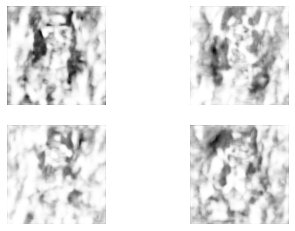

epoch:651 d_loss:0.6551 g_loss:3.8748
epoch:652 d_loss:0.1643 g_loss:9.8733
epoch:653 d_loss:1.0334 g_loss:5.3561
epoch:654 d_loss:0.4715 g_loss:1.3376
epoch:655 d_loss:0.5630 g_loss:2.3443
epoch:656 d_loss:0.1106 g_loss:6.0323
epoch:657 d_loss:0.3258 g_loss:6.2760
epoch:658 d_loss:0.5230 g_loss:2.9723
epoch:659 d_loss:0.3522 g_loss:1.6102
epoch:660 d_loss:0.2612 g_loss:2.5789
epoch:661 d_loss:0.1505 g_loss:4.7310
epoch:662 d_loss:0.3735 g_loss:4.1305
epoch:663 d_loss:0.2913 g_loss:2.1779
epoch:664 d_loss:0.3081 g_loss:1.7053
epoch:665 d_loss:0.2230 g_loss:2.8561
epoch:666 d_loss:0.2053 g_loss:3.7763
epoch:667 d_loss:0.2507 g_loss:3.3171
epoch:668 d_loss:0.1638 g_loss:2.2342
epoch:669 d_loss:0.2983 g_loss:2.4540
epoch:670 d_loss:0.1350 g_loss:3.8214
epoch:671 d_loss:0.3868 g_loss:1.7903
epoch:672 d_loss:0.4121 g_loss:2.9585
epoch:673 d_loss:0.2478 g_loss:3.3118
epoch:674 d_loss:0.3193 g_loss:1.4814
epoch:675 d_loss:0.2562 g_loss:2.8785
epoch:676 d_loss:0.1370 g_loss:4.4287
epoch:677 d_

<Figure size 720x576 with 0 Axes>

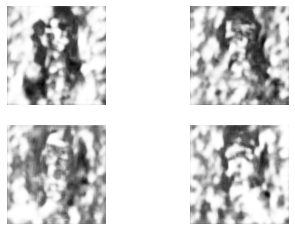

epoch:701 d_loss:0.3724 g_loss:3.5145
epoch:702 d_loss:0.2907 g_loss:2.2719
epoch:703 d_loss:0.3872 g_loss:1.8417
epoch:704 d_loss:0.1912 g_loss:2.9402
epoch:705 d_loss:0.1733 g_loss:3.8438
epoch:706 d_loss:0.2975 g_loss:3.2414
epoch:707 d_loss:0.1959 g_loss:2.3103
epoch:708 d_loss:0.2584 g_loss:2.5054
epoch:709 d_loss:0.1588 g_loss:3.6345
epoch:710 d_loss:0.2074 g_loss:3.5728
epoch:711 d_loss:0.2480 g_loss:2.5045
epoch:712 d_loss:0.1900 g_loss:2.8140
epoch:713 d_loss:0.1682 g_loss:3.5489
epoch:714 d_loss:0.2622 g_loss:2.5232
epoch:715 d_loss:0.1855 g_loss:2.5529
epoch:716 d_loss:0.1676 g_loss:3.4235
epoch:717 d_loss:0.2264 g_loss:3.0406
epoch:718 d_loss:0.1882 g_loss:2.7970
epoch:719 d_loss:0.2240 g_loss:2.8405
epoch:720 d_loss:0.1742 g_loss:3.0555
epoch:721 d_loss:0.1600 g_loss:3.0801
epoch:722 d_loss:0.2679 g_loss:2.4769
epoch:723 d_loss:0.2228 g_loss:3.0801
epoch:724 d_loss:0.1851 g_loss:3.8608
epoch:725 d_loss:0.3919 g_loss:2.0061
epoch:726 d_loss:0.2322 g_loss:2.7120
epoch:727 d_

<Figure size 720x576 with 0 Axes>

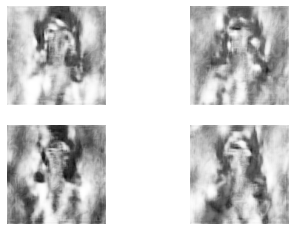

epoch:751 d_loss:0.3691 g_loss:2.4087
epoch:752 d_loss:0.3211 g_loss:2.8665
epoch:753 d_loss:0.2071 g_loss:3.7663
epoch:754 d_loss:0.4425 g_loss:2.3271
epoch:755 d_loss:0.1888 g_loss:3.9019
epoch:756 d_loss:0.2260 g_loss:3.1941
epoch:757 d_loss:0.4248 g_loss:2.7337
epoch:758 d_loss:0.2501 g_loss:3.9673
epoch:759 d_loss:0.3973 g_loss:2.2341
epoch:760 d_loss:0.3279 g_loss:2.4107
epoch:761 d_loss:0.2036 g_loss:3.9539
epoch:762 d_loss:0.3783 g_loss:2.2373
epoch:763 d_loss:0.3904 g_loss:2.8136
epoch:764 d_loss:0.2024 g_loss:3.7743
epoch:765 d_loss:0.3837 g_loss:2.1640
epoch:766 d_loss:0.2817 g_loss:2.9846
epoch:767 d_loss:0.1870 g_loss:3.8321
epoch:768 d_loss:0.3684 g_loss:1.9061
epoch:769 d_loss:0.4202 g_loss:3.0642
epoch:770 d_loss:0.2243 g_loss:4.4748
epoch:771 d_loss:0.8029 g_loss:1.1174
epoch:772 d_loss:0.3658 g_loss:2.7664
epoch:773 d_loss:0.2310 g_loss:4.1703
epoch:774 d_loss:0.7031 g_loss:1.2013
epoch:775 d_loss:0.5714 g_loss:2.0641
epoch:776 d_loss:0.2029 g_loss:4.0356
epoch:777 d_

<Figure size 720x576 with 0 Axes>

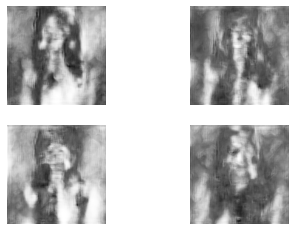

epoch:801 d_loss:0.5327 g_loss:1.7665
epoch:802 d_loss:0.3485 g_loss:2.4122
epoch:803 d_loss:0.2710 g_loss:3.0403
epoch:804 d_loss:0.4324 g_loss:2.1225
epoch:805 d_loss:0.4423 g_loss:2.1568
epoch:806 d_loss:0.2806 g_loss:2.7996
epoch:807 d_loss:0.3587 g_loss:1.8917
epoch:808 d_loss:0.4318 g_loss:2.4461
epoch:809 d_loss:0.2530 g_loss:3.1335
epoch:810 d_loss:0.5105 g_loss:1.4856
epoch:811 d_loss:0.4520 g_loss:2.4744
epoch:812 d_loss:0.2807 g_loss:3.2844
epoch:813 d_loss:0.4804 g_loss:1.2527
epoch:814 d_loss:0.5917 g_loss:1.7673
epoch:815 d_loss:0.2222 g_loss:3.6708
epoch:816 d_loss:0.5774 g_loss:1.5423
epoch:817 d_loss:0.5476 g_loss:1.4312
epoch:818 d_loss:0.3585 g_loss:2.6242
epoch:819 d_loss:0.3705 g_loss:2.5826
epoch:820 d_loss:0.4863 g_loss:1.5063
epoch:821 d_loss:0.3682 g_loss:2.2553
epoch:822 d_loss:0.3721 g_loss:2.6142
epoch:823 d_loss:0.3927 g_loss:1.7665
epoch:824 d_loss:0.3391 g_loss:2.4429
epoch:825 d_loss:0.3570 g_loss:2.6945
epoch:826 d_loss:0.3175 g_loss:2.3842
epoch:827 d_

<Figure size 720x576 with 0 Axes>

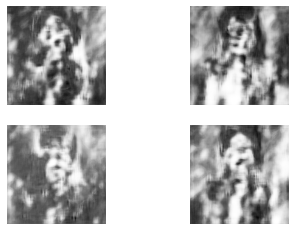

epoch:851 d_loss:0.1308 g_loss:4.0507
epoch:852 d_loss:0.2930 g_loss:2.5573
epoch:853 d_loss:0.1826 g_loss:3.1804
epoch:854 d_loss:0.1287 g_loss:3.7979
epoch:855 d_loss:0.1919 g_loss:3.2156
epoch:856 d_loss:0.2438 g_loss:3.6900
epoch:857 d_loss:0.2800 g_loss:2.6246
epoch:858 d_loss:0.4218 g_loss:6.1357
epoch:859 d_loss:1.2468 g_loss:1.0941
epoch:860 d_loss:0.2113 g_loss:3.5932
epoch:861 d_loss:0.2691 g_loss:4.3066
epoch:862 d_loss:0.6906 g_loss:1.1142
epoch:863 d_loss:0.8629 g_loss:2.5769
epoch:864 d_loss:0.4101 g_loss:4.8443
epoch:865 d_loss:1.0908 g_loss:2.7661
epoch:866 d_loss:1.4643 g_loss:0.6479
epoch:867 d_loss:0.4846 g_loss:2.7575
epoch:868 d_loss:0.5605 g_loss:2.6561
epoch:869 d_loss:0.8465 g_loss:1.0039
epoch:870 d_loss:0.4357 g_loss:2.0674
epoch:871 d_loss:0.3478 g_loss:2.4197
epoch:872 d_loss:0.4327 g_loss:2.0451
epoch:873 d_loss:0.4002 g_loss:1.9433
epoch:874 d_loss:0.3347 g_loss:2.4328
epoch:875 d_loss:0.5502 g_loss:2.0047
epoch:876 d_loss:0.3267 g_loss:2.0659
epoch:877 d_

<Figure size 720x576 with 0 Axes>

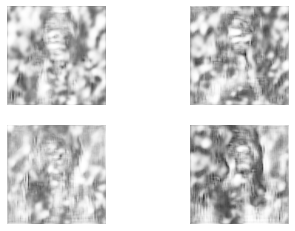

epoch:901 d_loss:0.1219 g_loss:4.0845
epoch:902 d_loss:0.1860 g_loss:3.4758
epoch:903 d_loss:0.1243 g_loss:4.4310
epoch:904 d_loss:0.1310 g_loss:4.2599
epoch:905 d_loss:0.1701 g_loss:3.3830
epoch:906 d_loss:0.1162 g_loss:3.9287
epoch:907 d_loss:0.0847 g_loss:5.0034
epoch:908 d_loss:0.0969 g_loss:4.7417
epoch:909 d_loss:0.1292 g_loss:3.2178
epoch:910 d_loss:0.1505 g_loss:3.4924
epoch:911 d_loss:0.0590 g_loss:5.4380
epoch:912 d_loss:0.0608 g_loss:5.5653
epoch:913 d_loss:0.0938 g_loss:3.8842
epoch:914 d_loss:0.1357 g_loss:3.4372
epoch:915 d_loss:0.0608 g_loss:4.6506
epoch:916 d_loss:0.0490 g_loss:5.6846
epoch:917 d_loss:0.1016 g_loss:4.5136
epoch:918 d_loss:0.1306 g_loss:3.9009
epoch:919 d_loss:0.1121 g_loss:4.5774
epoch:920 d_loss:0.1467 g_loss:4.6248
epoch:921 d_loss:0.2002 g_loss:3.7532
epoch:922 d_loss:0.2552 g_loss:4.5741
epoch:923 d_loss:0.0994 g_loss:6.0783
epoch:924 d_loss:0.3418 g_loss:2.7978
epoch:925 d_loss:0.3780 g_loss:5.3742
epoch:926 d_loss:0.3245 g_loss:5.6019
epoch:927 d_

<Figure size 720x576 with 0 Axes>

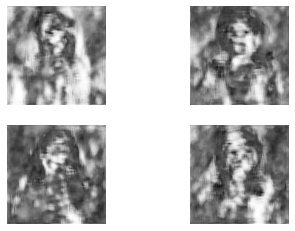

epoch:951 d_loss:0.1626 g_loss:3.8398
epoch:952 d_loss:0.1505 g_loss:2.7397
epoch:953 d_loss:0.1462 g_loss:2.6590
epoch:954 d_loss:0.1158 g_loss:3.2793
epoch:955 d_loss:0.1711 g_loss:3.1244
epoch:956 d_loss:0.2100 g_loss:3.1698
epoch:957 d_loss:0.2914 g_loss:3.0402
epoch:958 d_loss:0.3328 g_loss:2.8640
epoch:959 d_loss:0.4716 g_loss:3.0820
epoch:960 d_loss:0.3220 g_loss:3.3605
epoch:961 d_loss:0.3039 g_loss:2.1720
epoch:962 d_loss:0.3839 g_loss:2.8750
epoch:963 d_loss:0.2420 g_loss:4.1998
epoch:964 d_loss:0.3859 g_loss:1.7722
epoch:965 d_loss:0.3173 g_loss:2.1844
epoch:966 d_loss:0.2515 g_loss:3.2789
epoch:967 d_loss:0.4154 g_loss:2.7500
epoch:968 d_loss:0.6586 g_loss:2.6305
epoch:969 d_loss:0.4273 g_loss:3.1768
epoch:970 d_loss:0.7880 g_loss:1.9386
epoch:971 d_loss:0.3330 g_loss:3.1189
epoch:972 d_loss:0.5543 g_loss:2.4205
epoch:973 d_loss:0.4196 g_loss:2.5496
epoch:974 d_loss:0.3287 g_loss:3.0642
epoch:975 d_loss:0.4818 g_loss:2.2510
epoch:976 d_loss:0.5113 g_loss:2.7416
epoch:977 d_

<Figure size 720x576 with 0 Axes>

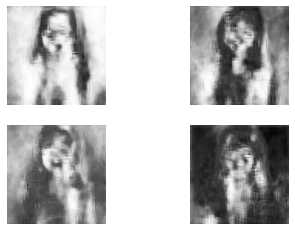

epoch:1001 d_loss:0.5278 g_loss:1.7428
epoch:1002 d_loss:0.4068 g_loss:2.3600
epoch:1003 d_loss:0.1915 g_loss:3.6684
epoch:1004 d_loss:0.5291 g_loss:1.5743
epoch:1005 d_loss:0.3934 g_loss:2.2266
epoch:1006 d_loss:0.2002 g_loss:3.5057
epoch:1007 d_loss:0.3460 g_loss:2.0548
epoch:1008 d_loss:0.3758 g_loss:2.2945
epoch:1009 d_loss:0.2657 g_loss:3.1208
epoch:1010 d_loss:0.3170 g_loss:2.4433
epoch:1011 d_loss:0.4095 g_loss:2.3047
epoch:1012 d_loss:0.1994 g_loss:3.3020
epoch:1013 d_loss:0.2426 g_loss:2.7481
epoch:1014 d_loss:0.3005 g_loss:2.6178
epoch:1015 d_loss:0.2495 g_loss:2.9475
epoch:1016 d_loss:0.2906 g_loss:2.7797
epoch:1017 d_loss:0.3127 g_loss:2.4296
epoch:1018 d_loss:0.1947 g_loss:3.0272
epoch:1019 d_loss:0.2593 g_loss:2.5080
epoch:1020 d_loss:0.2784 g_loss:2.7662
epoch:1021 d_loss:0.2639 g_loss:2.9243
epoch:1022 d_loss:0.2789 g_loss:2.5951
epoch:1023 d_loss:0.2662 g_loss:2.9209
epoch:1024 d_loss:0.3635 g_loss:2.5946
epoch:1025 d_loss:0.2861 g_loss:3.0266
epoch:1026 d_loss:0.2857 

<Figure size 720x576 with 0 Axes>

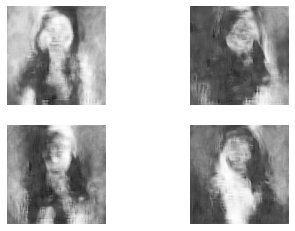

epoch:1051 d_loss:0.2017 g_loss:3.8817
epoch:1052 d_loss:0.6017 g_loss:1.6377
epoch:1053 d_loss:0.3035 g_loss:3.0677
epoch:1054 d_loss:0.2976 g_loss:3.0544
epoch:1055 d_loss:0.5466 g_loss:1.8757
epoch:1056 d_loss:0.2119 g_loss:3.2771
epoch:1057 d_loss:0.2116 g_loss:3.1543
epoch:1058 d_loss:0.4830 g_loss:2.3889
epoch:1059 d_loss:0.2197 g_loss:3.2011
epoch:1060 d_loss:0.3568 g_loss:2.3423
epoch:1061 d_loss:0.2628 g_loss:2.8934
epoch:1062 d_loss:0.2835 g_loss:2.5990
epoch:1063 d_loss:0.2174 g_loss:3.0997
epoch:1064 d_loss:0.2979 g_loss:2.6575
epoch:1065 d_loss:0.2397 g_loss:3.1597
epoch:1066 d_loss:0.3052 g_loss:3.0706
epoch:1067 d_loss:0.5011 g_loss:2.6954
epoch:1068 d_loss:0.2693 g_loss:3.0309
epoch:1069 d_loss:0.3611 g_loss:2.4659
epoch:1070 d_loss:0.3663 g_loss:3.1483
epoch:1071 d_loss:0.2014 g_loss:3.2929
epoch:1072 d_loss:0.4439 g_loss:2.3794
epoch:1073 d_loss:0.2360 g_loss:3.8495
epoch:1074 d_loss:0.5501 g_loss:3.0104
epoch:1075 d_loss:0.2039 g_loss:3.5120
epoch:1076 d_loss:0.4252 

<Figure size 720x576 with 0 Axes>

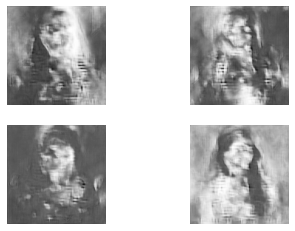

epoch:1101 d_loss:0.3550 g_loss:4.2712
epoch:1102 d_loss:0.2190 g_loss:4.4870
epoch:1103 d_loss:0.4156 g_loss:2.1972
epoch:1104 d_loss:0.2340 g_loss:4.2834
epoch:1105 d_loss:0.3161 g_loss:2.9933
epoch:1106 d_loss:0.3851 g_loss:3.8020
epoch:1107 d_loss:0.3102 g_loss:3.3134
epoch:1108 d_loss:0.2717 g_loss:3.3394
epoch:1109 d_loss:0.2775 g_loss:3.2264
epoch:1110 d_loss:0.3757 g_loss:3.1889
epoch:1111 d_loss:0.2979 g_loss:3.3455
epoch:1112 d_loss:0.3555 g_loss:3.0053
epoch:1113 d_loss:0.3625 g_loss:3.7423
epoch:1114 d_loss:0.3817 g_loss:2.3520
epoch:1115 d_loss:0.2335 g_loss:3.5101
epoch:1116 d_loss:0.3116 g_loss:3.0786
epoch:1117 d_loss:0.4282 g_loss:3.5394
epoch:1118 d_loss:0.4289 g_loss:3.1974
epoch:1119 d_loss:0.2877 g_loss:3.3241
epoch:1120 d_loss:0.2859 g_loss:2.4887
epoch:1121 d_loss:0.2036 g_loss:3.5220
epoch:1122 d_loss:0.2816 g_loss:3.0807
epoch:1123 d_loss:0.3375 g_loss:2.9465
epoch:1124 d_loss:0.2915 g_loss:3.7661
epoch:1125 d_loss:0.4301 g_loss:2.4631
epoch:1126 d_loss:0.1527 

<Figure size 720x576 with 0 Axes>

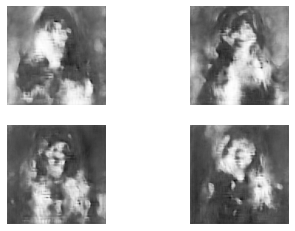

epoch:1151 d_loss:0.4310 g_loss:2.3390
epoch:1152 d_loss:0.4429 g_loss:3.4438
epoch:1153 d_loss:0.3143 g_loss:3.2736
epoch:1154 d_loss:0.7130 g_loss:2.3425
epoch:1155 d_loss:0.2084 g_loss:4.0465
epoch:1156 d_loss:0.3246 g_loss:2.5309
epoch:1157 d_loss:0.3178 g_loss:3.9101
epoch:1158 d_loss:0.2937 g_loss:3.8064
epoch:1159 d_loss:0.3339 g_loss:3.1164
epoch:1160 d_loss:0.2111 g_loss:3.5055
epoch:1161 d_loss:0.1780 g_loss:3.6074
epoch:1162 d_loss:0.2755 g_loss:3.6260
epoch:1163 d_loss:0.2823 g_loss:3.3948
epoch:1164 d_loss:0.2333 g_loss:3.4844
epoch:1165 d_loss:0.3050 g_loss:3.5284
epoch:1166 d_loss:0.2061 g_loss:3.2592
epoch:1167 d_loss:0.3837 g_loss:4.5576
epoch:1168 d_loss:0.5187 g_loss:2.3074
epoch:1169 d_loss:0.3185 g_loss:4.8715
epoch:1170 d_loss:0.7289 g_loss:2.3443
epoch:1171 d_loss:0.3348 g_loss:3.2877
epoch:1172 d_loss:0.3644 g_loss:2.2270
epoch:1173 d_loss:0.4471 g_loss:3.2907
epoch:1174 d_loss:0.4025 g_loss:3.1618
epoch:1175 d_loss:0.3034 g_loss:3.4014
epoch:1176 d_loss:0.3748 

<Figure size 720x576 with 0 Axes>

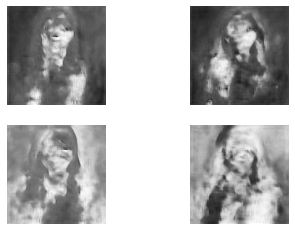

epoch:1201 d_loss:0.2891 g_loss:3.9037
epoch:1202 d_loss:0.7913 g_loss:1.9790
epoch:1203 d_loss:0.2569 g_loss:3.6076
epoch:1204 d_loss:0.3706 g_loss:2.0554
epoch:1205 d_loss:0.3323 g_loss:2.5083
epoch:1206 d_loss:0.1844 g_loss:3.8777
epoch:1207 d_loss:0.7283 g_loss:1.1197
epoch:1208 d_loss:0.2762 g_loss:4.0578
epoch:1209 d_loss:0.7767 g_loss:1.0402
epoch:1210 d_loss:0.5482 g_loss:2.8620
epoch:1211 d_loss:0.4921 g_loss:2.4214
epoch:1212 d_loss:0.6654 g_loss:1.4807
epoch:1213 d_loss:0.4196 g_loss:2.9970
epoch:1214 d_loss:0.3194 g_loss:2.7810
epoch:1215 d_loss:0.3145 g_loss:1.3502
epoch:1216 d_loss:0.4034 g_loss:2.3620
epoch:1217 d_loss:0.2532 g_loss:3.3956
epoch:1218 d_loss:0.4879 g_loss:1.4945
epoch:1219 d_loss:0.4413 g_loss:2.6551
epoch:1220 d_loss:0.2289 g_loss:4.0220
epoch:1221 d_loss:0.3986 g_loss:1.9877
epoch:1222 d_loss:0.6034 g_loss:2.6549
epoch:1223 d_loss:0.2130 g_loss:4.6386
epoch:1224 d_loss:0.6058 g_loss:1.1235
epoch:1225 d_loss:0.6057 g_loss:2.6580
epoch:1226 d_loss:0.2245 

<Figure size 720x576 with 0 Axes>

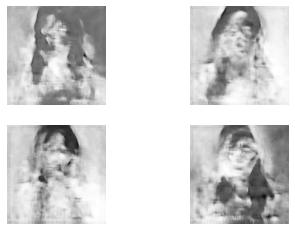

epoch:1251 d_loss:0.3426 g_loss:3.5648
epoch:1252 d_loss:0.3763 g_loss:3.7400
epoch:1253 d_loss:0.3045 g_loss:2.2696
epoch:1254 d_loss:0.2641 g_loss:3.2850
epoch:1255 d_loss:0.1986 g_loss:3.7958
epoch:1256 d_loss:0.2860 g_loss:2.9833
epoch:1257 d_loss:0.3717 g_loss:2.6691
epoch:1258 d_loss:0.2034 g_loss:4.4304
epoch:1259 d_loss:0.3662 g_loss:3.5146
epoch:1260 d_loss:0.2747 g_loss:3.0526
epoch:1261 d_loss:0.3007 g_loss:3.0769
epoch:1262 d_loss:0.3350 g_loss:3.5306
epoch:1263 d_loss:0.3057 g_loss:3.1642
epoch:1264 d_loss:0.2833 g_loss:3.2916
epoch:1265 d_loss:0.4063 g_loss:3.1547
epoch:1266 d_loss:0.4396 g_loss:3.6957
epoch:1267 d_loss:0.4434 g_loss:3.1229
epoch:1268 d_loss:0.8163 g_loss:2.7691
epoch:1269 d_loss:0.4211 g_loss:3.2611
epoch:1270 d_loss:0.5734 g_loss:2.5590
epoch:1271 d_loss:0.4588 g_loss:4.0684
epoch:1272 d_loss:1.0258 g_loss:1.8653
epoch:1273 d_loss:0.2303 g_loss:3.3338
epoch:1274 d_loss:0.5511 g_loss:1.9842
epoch:1275 d_loss:0.4987 g_loss:4.6242
epoch:1276 d_loss:0.6292 

<Figure size 720x576 with 0 Axes>

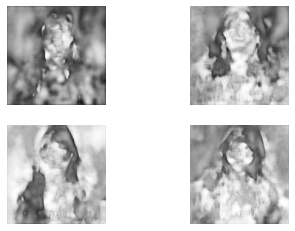

epoch:1301 d_loss:0.1335 g_loss:3.3664
epoch:1302 d_loss:0.1581 g_loss:3.2713
epoch:1303 d_loss:0.1826 g_loss:3.4449
epoch:1304 d_loss:0.2614 g_loss:3.2691
epoch:1305 d_loss:0.1565 g_loss:3.3544
epoch:1306 d_loss:0.0839 g_loss:4.3271
epoch:1307 d_loss:0.1601 g_loss:2.5873
epoch:1308 d_loss:0.3088 g_loss:5.7925
epoch:1309 d_loss:1.7811 g_loss:3.0998
epoch:1310 d_loss:0.2695 g_loss:6.7673
epoch:1311 d_loss:1.5292 g_loss:1.9284
epoch:1312 d_loss:0.8324 g_loss:3.2335
epoch:1313 d_loss:0.1528 g_loss:7.2981
epoch:1314 d_loss:1.4416 g_loss:0.6925
epoch:1315 d_loss:1.3912 g_loss:1.8010
epoch:1316 d_loss:0.0523 g_loss:7.0997
epoch:1317 d_loss:1.2914 g_loss:2.4114
epoch:1318 d_loss:0.5943 g_loss:0.8677
epoch:1319 d_loss:0.1383 g_loss:3.8875
epoch:1320 d_loss:0.2209 g_loss:4.7931
epoch:1321 d_loss:0.1696 g_loss:2.5105
epoch:1322 d_loss:0.3806 g_loss:3.4631
epoch:1323 d_loss:0.3174 g_loss:3.4893
epoch:1324 d_loss:0.7427 g_loss:3.3698
epoch:1325 d_loss:0.3592 g_loss:3.2876
epoch:1326 d_loss:0.4761 

<Figure size 720x576 with 0 Axes>

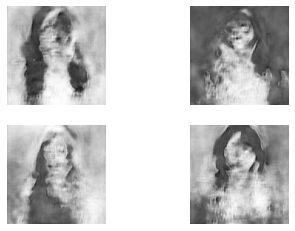

epoch:1351 d_loss:0.4629 g_loss:3.4179
epoch:1352 d_loss:0.5845 g_loss:1.3569
epoch:1353 d_loss:0.1908 g_loss:1.9698
epoch:1354 d_loss:0.3852 g_loss:4.9597
epoch:1355 d_loss:0.7260 g_loss:2.3978
epoch:1356 d_loss:0.9066 g_loss:2.9211
epoch:1357 d_loss:0.3756 g_loss:6.2103
epoch:1358 d_loss:0.5226 g_loss:1.9386
epoch:1359 d_loss:0.2546 g_loss:3.1898
epoch:1360 d_loss:0.2235 g_loss:3.5259
epoch:1361 d_loss:0.1972 g_loss:3.2769
epoch:1362 d_loss:0.1711 g_loss:3.2987
epoch:1363 d_loss:0.1171 g_loss:4.1186
epoch:1364 d_loss:0.1637 g_loss:4.0750
epoch:1365 d_loss:0.2702 g_loss:3.5029
epoch:1366 d_loss:0.2608 g_loss:3.6651
epoch:1367 d_loss:0.4423 g_loss:3.4321
epoch:1368 d_loss:0.3035 g_loss:3.8626
epoch:1369 d_loss:0.2618 g_loss:3.6708
epoch:1370 d_loss:0.3327 g_loss:3.3622
epoch:1371 d_loss:0.1590 g_loss:4.6457
epoch:1372 d_loss:0.3129 g_loss:2.4428
epoch:1373 d_loss:0.3512 g_loss:3.1644
epoch:1374 d_loss:0.1080 g_loss:5.0698
epoch:1375 d_loss:0.2457 g_loss:3.2301
epoch:1376 d_loss:0.3312 

<Figure size 720x576 with 0 Axes>

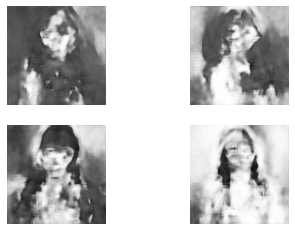

epoch:1401 d_loss:0.3122 g_loss:3.4156
epoch:1402 d_loss:0.2085 g_loss:3.9202
epoch:1403 d_loss:0.2764 g_loss:3.0235
epoch:1404 d_loss:0.2030 g_loss:3.1920
epoch:1405 d_loss:0.1847 g_loss:3.7944
epoch:1406 d_loss:0.2646 g_loss:2.8781
epoch:1407 d_loss:0.3001 g_loss:3.1777
epoch:1408 d_loss:0.2630 g_loss:3.8041
epoch:1409 d_loss:0.2941 g_loss:3.8697
epoch:1410 d_loss:0.5158 g_loss:2.3659
epoch:1411 d_loss:0.1906 g_loss:4.3650
epoch:1412 d_loss:0.4422 g_loss:2.3079
epoch:1413 d_loss:0.2054 g_loss:2.0519
epoch:1414 d_loss:0.2344 g_loss:4.4881
epoch:1415 d_loss:0.8040 g_loss:4.5917
epoch:1416 d_loss:0.6832 g_loss:4.8415
epoch:1417 d_loss:1.0709 g_loss:3.0553
epoch:1418 d_loss:0.2390 g_loss:8.0396
epoch:1419 d_loss:1.4744 g_loss:2.8195
epoch:1420 d_loss:0.2908 g_loss:1.2016
epoch:1421 d_loss:0.5818 g_loss:3.8516
epoch:1422 d_loss:0.0706 g_loss:8.6171
epoch:1423 d_loss:1.0583 g_loss:1.2459
epoch:1424 d_loss:1.6763 g_loss:7.1076
epoch:1425 d_loss:0.3616 g_loss:11.5401
epoch:1426 d_loss:1.1910

<Figure size 720x576 with 0 Axes>

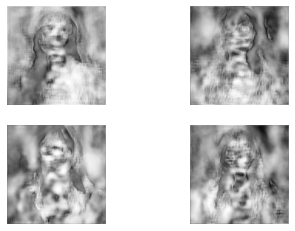

epoch:1451 d_loss:0.8617 g_loss:1.8814
epoch:1452 d_loss:0.0813 g_loss:5.3294
epoch:1453 d_loss:0.1795 g_loss:4.6289
epoch:1454 d_loss:0.2190 g_loss:4.1159
epoch:1455 d_loss:0.3022 g_loss:2.8876
epoch:1456 d_loss:0.2182 g_loss:3.4454
epoch:1457 d_loss:0.2755 g_loss:3.5154
epoch:1458 d_loss:0.2922 g_loss:3.1070
epoch:1459 d_loss:0.2554 g_loss:3.6197
epoch:1460 d_loss:0.2357 g_loss:4.3885
epoch:1461 d_loss:0.2412 g_loss:3.7356
epoch:1462 d_loss:0.3371 g_loss:2.9531
epoch:1463 d_loss:0.3715 g_loss:3.7684
epoch:1464 d_loss:0.5079 g_loss:2.8270
epoch:1465 d_loss:0.5162 g_loss:3.4252
epoch:1466 d_loss:0.5492 g_loss:3.1657
epoch:1467 d_loss:0.4451 g_loss:2.4290
epoch:1468 d_loss:0.4767 g_loss:2.4059
epoch:1469 d_loss:0.2927 g_loss:2.7563
epoch:1470 d_loss:0.0941 g_loss:3.3577
epoch:1471 d_loss:0.1386 g_loss:2.6863
epoch:1472 d_loss:0.2216 g_loss:3.8395
epoch:1473 d_loss:0.2515 g_loss:3.8637
epoch:1474 d_loss:0.6289 g_loss:2.6833
epoch:1475 d_loss:0.3415 g_loss:4.7483
epoch:1476 d_loss:0.4501 

<Figure size 720x576 with 0 Axes>

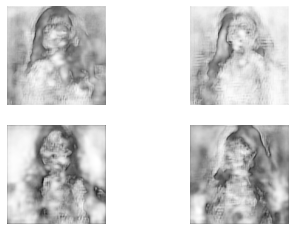

epoch:1501 d_loss:0.8318 g_loss:4.2068
epoch:1502 d_loss:0.5018 g_loss:5.9161
epoch:1503 d_loss:0.8333 g_loss:1.2297
epoch:1504 d_loss:0.9044 g_loss:4.3111
epoch:1505 d_loss:0.1476 g_loss:11.1945
epoch:1506 d_loss:0.9876 g_loss:10.3038
epoch:1507 d_loss:0.5801 g_loss:5.1868
epoch:1508 d_loss:0.7081 g_loss:3.2735
epoch:1509 d_loss:0.3165 g_loss:7.1536
epoch:1510 d_loss:0.3101 g_loss:11.2626
epoch:1511 d_loss:0.2180 g_loss:10.5243
epoch:1512 d_loss:0.4525 g_loss:6.8463
epoch:1513 d_loss:0.3410 g_loss:8.7404
epoch:1514 d_loss:0.0307 g_loss:8.9819
epoch:1515 d_loss:0.0192 g_loss:7.6817
epoch:1516 d_loss:0.0269 g_loss:6.5307
epoch:1517 d_loss:0.0204 g_loss:6.5543
epoch:1518 d_loss:0.0297 g_loss:5.5395
epoch:1519 d_loss:0.0397 g_loss:4.2317
epoch:1520 d_loss:0.0785 g_loss:3.8568
epoch:1521 d_loss:0.0706 g_loss:4.6200
epoch:1522 d_loss:0.2108 g_loss:4.2095
epoch:1523 d_loss:0.1958 g_loss:3.9895
epoch:1524 d_loss:0.1351 g_loss:7.4279
epoch:1525 d_loss:0.2419 g_loss:3.6393
epoch:1526 d_loss:0.0

<Figure size 720x576 with 0 Axes>

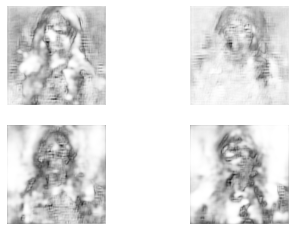

epoch:1551 d_loss:0.0477 g_loss:5.8188
epoch:1552 d_loss:0.0783 g_loss:5.9343
epoch:1553 d_loss:0.0582 g_loss:5.1540
epoch:1554 d_loss:0.0219 g_loss:4.8591
epoch:1555 d_loss:0.1448 g_loss:4.1232
epoch:1556 d_loss:0.2229 g_loss:4.0819
epoch:1557 d_loss:0.2363 g_loss:5.6049
epoch:1558 d_loss:0.1758 g_loss:6.5417
epoch:1559 d_loss:0.4908 g_loss:3.4687
epoch:1560 d_loss:0.3093 g_loss:4.3241
epoch:1561 d_loss:0.2249 g_loss:5.9549
epoch:1562 d_loss:0.1626 g_loss:6.6834
epoch:1563 d_loss:0.2587 g_loss:3.5190
epoch:1564 d_loss:0.2021 g_loss:3.2406
epoch:1565 d_loss:0.0765 g_loss:5.3552
epoch:1566 d_loss:0.0561 g_loss:7.1080
epoch:1567 d_loss:0.0874 g_loss:7.0838
epoch:1568 d_loss:0.1424 g_loss:4.2978
epoch:1569 d_loss:0.0955 g_loss:3.5770
epoch:1570 d_loss:0.0487 g_loss:5.5619
epoch:1571 d_loss:0.0259 g_loss:7.1330
epoch:1572 d_loss:0.0820 g_loss:6.2441
epoch:1573 d_loss:0.0985 g_loss:3.5003
epoch:1574 d_loss:0.1388 g_loss:3.8940
epoch:1575 d_loss:0.0555 g_loss:5.3623
epoch:1576 d_loss:0.0797 

<Figure size 720x576 with 0 Axes>

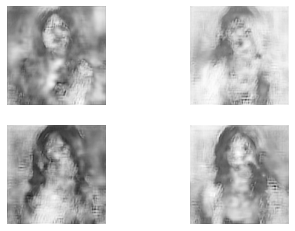

epoch:1601 d_loss:0.5704 g_loss:2.4935
epoch:1602 d_loss:0.0446 g_loss:6.3803
epoch:1603 d_loss:0.2912 g_loss:5.0896
epoch:1604 d_loss:0.2796 g_loss:2.2217
epoch:1605 d_loss:0.8054 g_loss:2.9778
epoch:1606 d_loss:0.3143 g_loss:6.8569
epoch:1607 d_loss:1.0266 g_loss:5.8790
epoch:1608 d_loss:0.5151 g_loss:1.9044
epoch:1609 d_loss:0.2645 g_loss:3.6956
epoch:1610 d_loss:0.1708 g_loss:6.6188
epoch:1611 d_loss:0.3876 g_loss:4.5436
epoch:1612 d_loss:0.4668 g_loss:2.6157
epoch:1613 d_loss:0.0391 g_loss:5.4302
epoch:1614 d_loss:0.1020 g_loss:6.4729
epoch:1615 d_loss:0.1708 g_loss:4.3252
epoch:1616 d_loss:0.2857 g_loss:2.4674
epoch:1617 d_loss:0.2506 g_loss:3.8486
epoch:1618 d_loss:0.1461 g_loss:5.8237
epoch:1619 d_loss:0.4129 g_loss:5.9097
epoch:1620 d_loss:0.2603 g_loss:4.1018
epoch:1621 d_loss:0.3509 g_loss:3.0791
epoch:1622 d_loss:0.0790 g_loss:5.6343
epoch:1623 d_loss:0.1388 g_loss:5.6413
epoch:1624 d_loss:0.3403 g_loss:2.4405
epoch:1625 d_loss:0.3791 g_loss:3.9781
epoch:1626 d_loss:0.0657 

<Figure size 720x576 with 0 Axes>

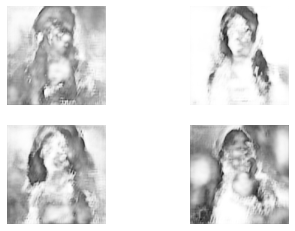

epoch:1651 d_loss:0.5234 g_loss:3.7050
epoch:1652 d_loss:0.4216 g_loss:5.7634
epoch:1653 d_loss:0.4847 g_loss:4.8470
epoch:1654 d_loss:0.4584 g_loss:4.1090
epoch:1655 d_loss:0.3298 g_loss:5.6915
epoch:1656 d_loss:0.6247 g_loss:3.9699
epoch:1657 d_loss:0.1951 g_loss:5.1794
epoch:1658 d_loss:0.1018 g_loss:7.5942
epoch:1659 d_loss:0.1223 g_loss:5.7886
epoch:1660 d_loss:0.1726 g_loss:5.6007
epoch:1661 d_loss:0.2415 g_loss:4.9687
epoch:1662 d_loss:0.5201 g_loss:3.1660
epoch:1663 d_loss:0.3317 g_loss:4.0919
epoch:1664 d_loss:0.2501 g_loss:4.0034
epoch:1665 d_loss:0.1876 g_loss:3.1234
epoch:1666 d_loss:0.0947 g_loss:3.9230
epoch:1667 d_loss:0.0513 g_loss:4.6578
epoch:1668 d_loss:0.0802 g_loss:4.0035
epoch:1669 d_loss:0.0718 g_loss:3.5447
epoch:1670 d_loss:0.0679 g_loss:3.8476
epoch:1671 d_loss:0.0463 g_loss:4.9376
epoch:1672 d_loss:0.1065 g_loss:3.0527
epoch:1673 d_loss:0.1348 g_loss:3.8630
epoch:1674 d_loss:0.0433 g_loss:6.0994
epoch:1675 d_loss:0.2595 g_loss:2.0004
epoch:1676 d_loss:0.3459 

<Figure size 720x576 with 0 Axes>

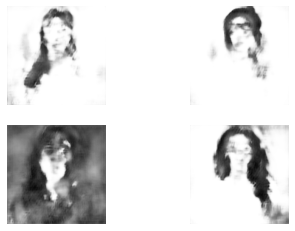

epoch:1701 d_loss:0.0591 g_loss:7.0893
epoch:1702 d_loss:0.7005 g_loss:1.6948
epoch:1703 d_loss:0.6725 g_loss:3.4389
epoch:1704 d_loss:0.2025 g_loss:7.2178
epoch:1705 d_loss:0.7282 g_loss:2.8356
epoch:1706 d_loss:0.6527 g_loss:2.9560
epoch:1707 d_loss:0.0372 g_loss:7.4163
epoch:1708 d_loss:0.2899 g_loss:7.3095
epoch:1709 d_loss:0.2834 g_loss:4.3525
epoch:1710 d_loss:0.0730 g_loss:3.2931
epoch:1711 d_loss:0.1055 g_loss:3.3701
epoch:1712 d_loss:0.0982 g_loss:4.4940
epoch:1713 d_loss:0.0527 g_loss:6.0673
epoch:1714 d_loss:0.0695 g_loss:6.4429
epoch:1715 d_loss:0.0936 g_loss:5.6791
epoch:1716 d_loss:0.0958 g_loss:4.1107
epoch:1717 d_loss:0.1060 g_loss:3.8390
epoch:1718 d_loss:0.0798 g_loss:4.3661
epoch:1719 d_loss:0.1224 g_loss:4.8541
epoch:1720 d_loss:0.0996 g_loss:4.9881
epoch:1721 d_loss:0.0774 g_loss:4.6551
epoch:1722 d_loss:0.1315 g_loss:4.5110
epoch:1723 d_loss:0.1510 g_loss:5.3418
epoch:1724 d_loss:0.1711 g_loss:5.8992
epoch:1725 d_loss:0.3779 g_loss:3.6686
epoch:1726 d_loss:0.4591 

<Figure size 720x576 with 0 Axes>

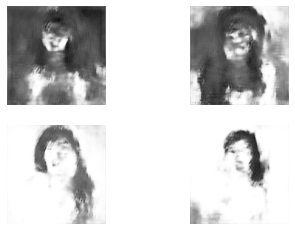

epoch:1751 d_loss:0.5681 g_loss:2.8911
epoch:1752 d_loss:0.2735 g_loss:4.6681
epoch:1753 d_loss:0.2105 g_loss:4.6513
epoch:1754 d_loss:0.0762 g_loss:6.2717
epoch:1755 d_loss:0.2300 g_loss:4.9839
epoch:1756 d_loss:0.4306 g_loss:2.3271
epoch:1757 d_loss:0.2247 g_loss:3.2202
epoch:1758 d_loss:0.1458 g_loss:5.0439
epoch:1759 d_loss:0.2563 g_loss:3.7250
epoch:1760 d_loss:0.1602 g_loss:3.4484
epoch:1761 d_loss:0.0901 g_loss:4.7830
epoch:1762 d_loss:0.1367 g_loss:5.0048
epoch:1763 d_loss:0.0667 g_loss:4.9071
epoch:1764 d_loss:0.1040 g_loss:4.5672
epoch:1765 d_loss:0.1794 g_loss:3.3351
epoch:1766 d_loss:0.1087 g_loss:4.0786
epoch:1767 d_loss:0.0731 g_loss:4.8394
epoch:1768 d_loss:0.1090 g_loss:3.5772
epoch:1769 d_loss:0.1951 g_loss:3.3189
epoch:1770 d_loss:0.0675 g_loss:4.7282
epoch:1771 d_loss:0.1823 g_loss:3.9831
epoch:1772 d_loss:0.1502 g_loss:4.0674
epoch:1773 d_loss:0.1853 g_loss:4.8488
epoch:1774 d_loss:0.3759 g_loss:4.8699
epoch:1775 d_loss:0.2216 g_loss:5.0093
epoch:1776 d_loss:0.2085 

<Figure size 720x576 with 0 Axes>

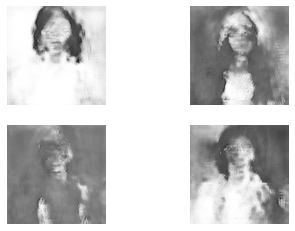

epoch:1801 d_loss:0.2282 g_loss:3.1171
epoch:1802 d_loss:0.3072 g_loss:4.0944
epoch:1803 d_loss:0.3368 g_loss:3.5730
epoch:1804 d_loss:0.3699 g_loss:2.4822
epoch:1805 d_loss:0.1137 g_loss:4.2226
epoch:1806 d_loss:0.0725 g_loss:5.7384
epoch:1807 d_loss:0.1447 g_loss:3.5806
epoch:1808 d_loss:0.1063 g_loss:4.1167
epoch:1809 d_loss:0.0667 g_loss:5.0766
epoch:1810 d_loss:0.1621 g_loss:3.5399
epoch:1811 d_loss:0.1274 g_loss:4.3551
epoch:1812 d_loss:0.0734 g_loss:5.4628
epoch:1813 d_loss:0.5555 g_loss:2.4406
epoch:1814 d_loss:0.2211 g_loss:4.9126
epoch:1815 d_loss:0.1780 g_loss:6.4126
epoch:1816 d_loss:0.3452 g_loss:3.1600
epoch:1817 d_loss:0.2946 g_loss:3.4884
epoch:1818 d_loss:0.1029 g_loss:5.6999
epoch:1819 d_loss:0.1603 g_loss:5.9769
epoch:1820 d_loss:0.1623 g_loss:3.3166
epoch:1821 d_loss:0.1818 g_loss:3.8384
epoch:1822 d_loss:0.1000 g_loss:5.3500
epoch:1823 d_loss:0.1380 g_loss:5.1507
epoch:1824 d_loss:0.2522 g_loss:2.6936
epoch:1825 d_loss:0.1614 g_loss:3.9915
epoch:1826 d_loss:0.0771 

<Figure size 720x576 with 0 Axes>

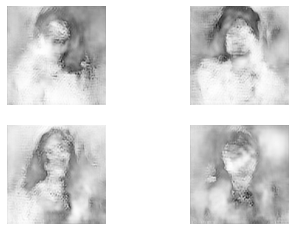

epoch:1851 d_loss:0.0800 g_loss:5.3218
epoch:1852 d_loss:0.1285 g_loss:3.4802
epoch:1853 d_loss:0.1776 g_loss:3.4200
epoch:1854 d_loss:0.0760 g_loss:4.8804
epoch:1855 d_loss:0.1239 g_loss:5.0765
epoch:1856 d_loss:0.1344 g_loss:4.2942
epoch:1857 d_loss:0.1455 g_loss:3.9983
epoch:1858 d_loss:0.1726 g_loss:4.2177
epoch:1859 d_loss:0.1808 g_loss:4.5578
epoch:1860 d_loss:0.2028 g_loss:4.2067
epoch:1861 d_loss:0.2733 g_loss:3.6202
epoch:1862 d_loss:0.2645 g_loss:4.1440
epoch:1863 d_loss:0.1760 g_loss:5.1469
epoch:1864 d_loss:0.2332 g_loss:4.5346
epoch:1865 d_loss:0.2579 g_loss:3.2513
epoch:1866 d_loss:0.3020 g_loss:3.6116
epoch:1867 d_loss:0.2146 g_loss:4.5723
epoch:1868 d_loss:0.5074 g_loss:3.0096
epoch:1869 d_loss:0.2270 g_loss:3.4353
epoch:1870 d_loss:0.1149 g_loss:4.7212
epoch:1871 d_loss:0.1945 g_loss:3.6863
epoch:1872 d_loss:0.1465 g_loss:3.4161
epoch:1873 d_loss:0.0789 g_loss:4.7428
epoch:1874 d_loss:0.0814 g_loss:5.3502
epoch:1875 d_loss:0.1489 g_loss:4.1015
epoch:1876 d_loss:0.1702 

<Figure size 720x576 with 0 Axes>

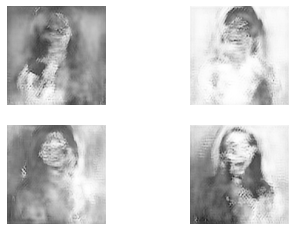

epoch:1901 d_loss:0.0763 g_loss:6.5224
epoch:1902 d_loss:0.3079 g_loss:2.4517
epoch:1903 d_loss:0.3958 g_loss:3.6418
epoch:1904 d_loss:0.1081 g_loss:7.6166
epoch:1905 d_loss:0.6443 g_loss:2.5947
epoch:1906 d_loss:0.3749 g_loss:3.5914
epoch:1907 d_loss:0.0354 g_loss:7.1175
epoch:1908 d_loss:0.1792 g_loss:6.5636
epoch:1909 d_loss:0.1661 g_loss:3.4397
epoch:1910 d_loss:0.2488 g_loss:3.0067
epoch:1911 d_loss:0.1015 g_loss:4.7082
epoch:1912 d_loss:0.0947 g_loss:5.4293
epoch:1913 d_loss:0.2025 g_loss:3.1247
epoch:1914 d_loss:0.1913 g_loss:3.5548
epoch:1915 d_loss:0.0672 g_loss:5.4646
epoch:1916 d_loss:0.0739 g_loss:5.8420
epoch:1917 d_loss:0.1290 g_loss:4.0784
epoch:1918 d_loss:0.1388 g_loss:3.1853
epoch:1919 d_loss:0.1128 g_loss:5.0136
epoch:1920 d_loss:0.0754 g_loss:6.7640
epoch:1921 d_loss:0.1821 g_loss:4.7757
epoch:1922 d_loss:0.1442 g_loss:3.7194
epoch:1923 d_loss:0.0895 g_loss:5.1412
epoch:1924 d_loss:0.0656 g_loss:6.4228
epoch:1925 d_loss:0.1328 g_loss:5.5751
epoch:1926 d_loss:0.0780 

<Figure size 720x576 with 0 Axes>

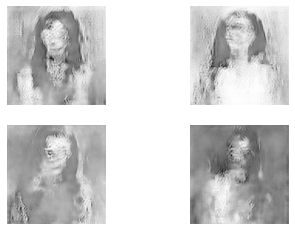

epoch:1951 d_loss:0.0799 g_loss:7.6737
epoch:1952 d_loss:0.5523 g_loss:1.4808
epoch:1953 d_loss:0.9784 g_loss:4.8963
epoch:1954 d_loss:0.2058 g_loss:11.0134
epoch:1955 d_loss:1.1995 g_loss:4.1623
epoch:1956 d_loss:1.1973 g_loss:2.7632
epoch:1957 d_loss:0.1505 g_loss:8.9376
epoch:1958 d_loss:0.3843 g_loss:4.1599
epoch:1959 d_loss:0.3916 g_loss:3.4349
epoch:1960 d_loss:0.1813 g_loss:4.8448
epoch:1961 d_loss:0.6221 g_loss:3.0619
epoch:1962 d_loss:0.2136 g_loss:4.0727
epoch:1963 d_loss:0.0399 g_loss:5.9215
epoch:1964 d_loss:0.2027 g_loss:4.4117
epoch:1965 d_loss:0.1690 g_loss:3.0989
epoch:1966 d_loss:0.2130 g_loss:4.0174
epoch:1967 d_loss:0.0703 g_loss:5.5779
epoch:1968 d_loss:0.3169 g_loss:3.7121
epoch:1969 d_loss:0.2347 g_loss:3.3026
epoch:1970 d_loss:0.1484 g_loss:5.1613
epoch:1971 d_loss:0.2687 g_loss:5.7221
epoch:1972 d_loss:0.2334 g_loss:4.5070
epoch:1973 d_loss:0.0937 g_loss:4.7912
epoch:1974 d_loss:0.0666 g_loss:4.2979
epoch:1975 d_loss:0.1441 g_loss:4.1770
epoch:1976 d_loss:0.0626

<Figure size 720x576 with 0 Axes>

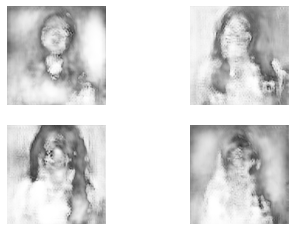

epoch:2001 d_loss:0.2243 g_loss:4.2684
epoch:2002 d_loss:0.2140 g_loss:4.8455
epoch:2003 d_loss:0.2542 g_loss:6.7634
epoch:2004 d_loss:0.4783 g_loss:5.1830
epoch:2005 d_loss:0.1094 g_loss:5.9137
epoch:2006 d_loss:0.1208 g_loss:6.6548
epoch:2007 d_loss:0.2103 g_loss:4.7338
epoch:2008 d_loss:0.2672 g_loss:4.6543
epoch:2009 d_loss:0.1434 g_loss:5.3932
epoch:2010 d_loss:0.3105 g_loss:4.1610
epoch:2011 d_loss:0.1737 g_loss:4.8312
epoch:2012 d_loss:0.1337 g_loss:5.2138
epoch:2013 d_loss:0.3369 g_loss:4.0186
epoch:2014 d_loss:0.4029 g_loss:5.3292
epoch:2015 d_loss:0.2937 g_loss:5.5196
epoch:2016 d_loss:0.3676 g_loss:5.0632
epoch:2017 d_loss:0.1773 g_loss:5.4583
epoch:2018 d_loss:0.0503 g_loss:6.6263
epoch:2019 d_loss:0.2743 g_loss:3.4714
epoch:2020 d_loss:0.4685 g_loss:4.7623
epoch:2021 d_loss:0.1976 g_loss:5.9331
epoch:2022 d_loss:0.4997 g_loss:2.1477
epoch:2023 d_loss:0.2929 g_loss:5.9709
epoch:2024 d_loss:0.0904 g_loss:11.0585
epoch:2025 d_loss:0.7013 g_loss:3.6320
epoch:2026 d_loss:0.3732

<Figure size 720x576 with 0 Axes>

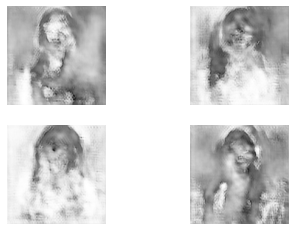

epoch:2051 d_loss:0.2307 g_loss:5.9186
epoch:2052 d_loss:0.2076 g_loss:2.9105
epoch:2053 d_loss:0.2858 g_loss:2.9813
epoch:2054 d_loss:0.0356 g_loss:5.9805
epoch:2055 d_loss:0.0724 g_loss:6.3688
epoch:2056 d_loss:0.1945 g_loss:4.2420
epoch:2057 d_loss:0.1158 g_loss:3.2092
epoch:2058 d_loss:0.1466 g_loss:4.3437
epoch:2059 d_loss:0.1183 g_loss:5.0994
epoch:2060 d_loss:0.1789 g_loss:3.9018
epoch:2061 d_loss:0.1849 g_loss:3.6024
epoch:2062 d_loss:0.0873 g_loss:5.1358
epoch:2063 d_loss:0.1343 g_loss:4.2301
epoch:2064 d_loss:0.1214 g_loss:4.2878
epoch:2065 d_loss:0.1122 g_loss:4.9735
epoch:2066 d_loss:0.1017 g_loss:4.9308
epoch:2067 d_loss:0.0766 g_loss:5.0525
epoch:2068 d_loss:0.1611 g_loss:4.2429
epoch:2069 d_loss:0.1210 g_loss:4.5448
epoch:2070 d_loss:0.1399 g_loss:4.2870
epoch:2071 d_loss:0.2185 g_loss:3.6178
epoch:2072 d_loss:0.1180 g_loss:4.7791
epoch:2073 d_loss:0.2393 g_loss:3.4836
epoch:2074 d_loss:0.2770 g_loss:4.3835
epoch:2075 d_loss:0.1866 g_loss:4.8251
epoch:2076 d_loss:0.2791 

<Figure size 720x576 with 0 Axes>

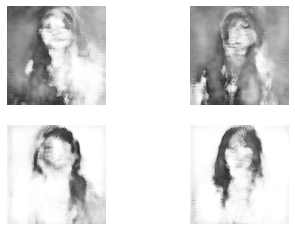

epoch:2101 d_loss:0.0269 g_loss:19.2144
epoch:2102 d_loss:3.0323 g_loss:8.1447
epoch:2103 d_loss:0.3311 g_loss:1.9769
epoch:2104 d_loss:0.8256 g_loss:3.8977
epoch:2105 d_loss:0.0794 g_loss:10.2922
epoch:2106 d_loss:0.5561 g_loss:9.6036
epoch:2107 d_loss:0.4755 g_loss:4.6544
epoch:2108 d_loss:0.4352 g_loss:3.0234
epoch:2109 d_loss:0.2321 g_loss:5.4208
epoch:2110 d_loss:0.1785 g_loss:7.5920
epoch:2111 d_loss:0.1495 g_loss:7.5741
epoch:2112 d_loss:0.4318 g_loss:4.2162
epoch:2113 d_loss:0.6301 g_loss:4.3466
epoch:2114 d_loss:0.2227 g_loss:7.8709
epoch:2115 d_loss:1.0095 g_loss:4.3883
epoch:2116 d_loss:1.5349 g_loss:4.1933
epoch:2117 d_loss:0.4484 g_loss:9.6037
epoch:2118 d_loss:0.7522 g_loss:8.0168
epoch:2119 d_loss:0.9069 g_loss:6.5556
epoch:2120 d_loss:1.1992 g_loss:4.3294
epoch:2121 d_loss:1.7492 g_loss:3.9196
epoch:2122 d_loss:0.8216 g_loss:4.6712
epoch:2123 d_loss:0.7419 g_loss:4.0140
epoch:2124 d_loss:0.4806 g_loss:4.6911
epoch:2125 d_loss:0.3839 g_loss:6.2247
epoch:2126 d_loss:0.163

<Figure size 720x576 with 0 Axes>

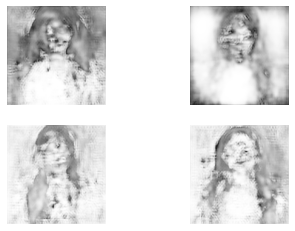

epoch:2151 d_loss:0.6541 g_loss:5.4977
epoch:2152 d_loss:0.3771 g_loss:3.5717
epoch:2153 d_loss:0.0583 g_loss:5.9795
epoch:2154 d_loss:0.0475 g_loss:7.8755
epoch:2155 d_loss:0.0321 g_loss:8.7932
epoch:2156 d_loss:0.0572 g_loss:7.4777
epoch:2157 d_loss:0.0958 g_loss:5.5192
epoch:2158 d_loss:0.2181 g_loss:4.7465
epoch:2159 d_loss:0.1365 g_loss:7.0880
epoch:2160 d_loss:0.1309 g_loss:8.2196
epoch:2161 d_loss:0.5030 g_loss:4.5488
epoch:2162 d_loss:0.3019 g_loss:5.4316
epoch:2163 d_loss:0.2053 g_loss:6.9192
epoch:2164 d_loss:0.6279 g_loss:3.9999
epoch:2165 d_loss:0.5262 g_loss:5.4741
epoch:2166 d_loss:0.5693 g_loss:6.0885
epoch:2167 d_loss:0.4746 g_loss:5.0397
epoch:2168 d_loss:0.1987 g_loss:4.4776
epoch:2169 d_loss:0.1142 g_loss:5.6541
epoch:2170 d_loss:0.1237 g_loss:5.7182
epoch:2171 d_loss:0.1568 g_loss:4.6375
epoch:2172 d_loss:0.3624 g_loss:4.3123
epoch:2173 d_loss:0.4169 g_loss:4.6393
epoch:2174 d_loss:0.7842 g_loss:4.1641
epoch:2175 d_loss:0.6204 g_loss:3.5480
epoch:2176 d_loss:0.2269 

<Figure size 720x576 with 0 Axes>

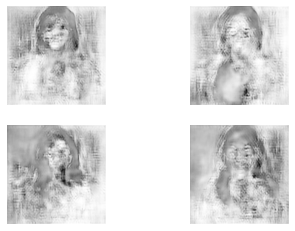

epoch:2201 d_loss:0.1459 g_loss:4.2161
epoch:2202 d_loss:0.1863 g_loss:6.1475
epoch:2203 d_loss:0.2657 g_loss:4.4383
epoch:2204 d_loss:0.4663 g_loss:5.2659
epoch:2205 d_loss:0.2153 g_loss:5.4625
epoch:2206 d_loss:0.5530 g_loss:3.4495
epoch:2207 d_loss:0.3516 g_loss:5.9572
epoch:2208 d_loss:0.2788 g_loss:6.4087
epoch:2209 d_loss:0.2246 g_loss:4.5118
epoch:2210 d_loss:0.3664 g_loss:4.5122
epoch:2211 d_loss:0.0926 g_loss:7.7240
epoch:2212 d_loss:0.6806 g_loss:1.8024
epoch:2213 d_loss:0.7454 g_loss:5.7558
epoch:2214 d_loss:0.4104 g_loss:10.9006
epoch:2215 d_loss:1.5399 g_loss:0.5292
epoch:2216 d_loss:2.2102 g_loss:3.4150
epoch:2217 d_loss:0.0413 g_loss:15.7578
epoch:2218 d_loss:2.6196 g_loss:6.1375
epoch:2219 d_loss:1.1031 g_loss:5.9651
epoch:2220 d_loss:0.2747 g_loss:8.2102
epoch:2221 d_loss:0.2302 g_loss:8.1498
epoch:2222 d_loss:0.2355 g_loss:6.0095
epoch:2223 d_loss:0.4349 g_loss:3.8813
epoch:2224 d_loss:0.1970 g_loss:5.2953
epoch:2225 d_loss:0.1121 g_loss:6.6373
epoch:2226 d_loss:0.178

<Figure size 720x576 with 0 Axes>

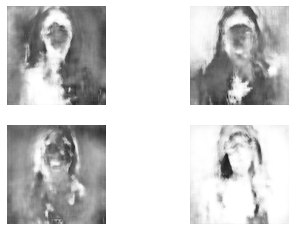

epoch:2251 d_loss:0.1574 g_loss:5.3492
epoch:2252 d_loss:0.1229 g_loss:6.1179
epoch:2253 d_loss:0.2017 g_loss:5.0660
epoch:2254 d_loss:0.2150 g_loss:4.6812
epoch:2255 d_loss:0.1852 g_loss:4.7914
epoch:2256 d_loss:0.2473 g_loss:5.3310
epoch:2257 d_loss:0.3017 g_loss:5.5618
epoch:2258 d_loss:0.3433 g_loss:4.2678
epoch:2259 d_loss:0.2467 g_loss:5.3939
epoch:2260 d_loss:0.2841 g_loss:4.7319
epoch:2261 d_loss:0.3471 g_loss:4.3214
epoch:2262 d_loss:0.1823 g_loss:5.8026
epoch:2263 d_loss:0.5924 g_loss:3.6561
epoch:2264 d_loss:0.2763 g_loss:4.9438
epoch:2265 d_loss:0.4832 g_loss:3.4369
epoch:2266 d_loss:0.2663 g_loss:4.2759
epoch:2267 d_loss:0.1530 g_loss:4.1702
epoch:2268 d_loss:0.2305 g_loss:3.6431
epoch:2269 d_loss:0.0839 g_loss:5.2816
epoch:2270 d_loss:0.1023 g_loss:5.6883
epoch:2271 d_loss:0.1022 g_loss:4.2534
epoch:2272 d_loss:0.1184 g_loss:5.9329
epoch:2273 d_loss:0.1203 g_loss:3.9540
epoch:2274 d_loss:0.1242 g_loss:4.9810
epoch:2275 d_loss:0.1931 g_loss:3.6769
epoch:2276 d_loss:0.2253 

<Figure size 720x576 with 0 Axes>

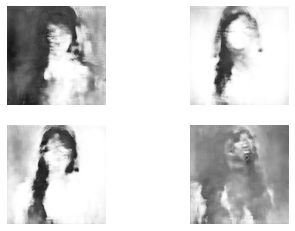

epoch:2301 d_loss:0.6895 g_loss:3.9472
epoch:2302 d_loss:0.1365 g_loss:8.7018
epoch:2303 d_loss:0.7726 g_loss:3.0739
epoch:2304 d_loss:0.4063 g_loss:2.6551
epoch:2305 d_loss:0.0941 g_loss:5.5194
epoch:2306 d_loss:0.1268 g_loss:6.6661
epoch:2307 d_loss:0.3063 g_loss:2.6361
epoch:2308 d_loss:0.4959 g_loss:3.8183
epoch:2309 d_loss:0.1185 g_loss:7.2254
epoch:2310 d_loss:1.0658 g_loss:1.0389
epoch:2311 d_loss:1.2250 g_loss:2.6238
epoch:2312 d_loss:0.0846 g_loss:9.6471
epoch:2313 d_loss:0.8099 g_loss:9.4766
epoch:2314 d_loss:0.2747 g_loss:3.9332
epoch:2315 d_loss:0.4848 g_loss:2.8956
epoch:2316 d_loss:0.1303 g_loss:6.4116
epoch:2317 d_loss:0.1684 g_loss:8.2016
epoch:2318 d_loss:0.2402 g_loss:6.0998
epoch:2319 d_loss:0.5170 g_loss:2.9772
epoch:2320 d_loss:0.5374 g_loss:3.8557
epoch:2321 d_loss:0.1203 g_loss:8.8183
epoch:2322 d_loss:0.6136 g_loss:7.4747
epoch:2323 d_loss:0.1554 g_loss:4.4212
epoch:2324 d_loss:0.1451 g_loss:3.8507
epoch:2325 d_loss:0.2172 g_loss:4.5300
epoch:2326 d_loss:0.0643 

<Figure size 720x576 with 0 Axes>

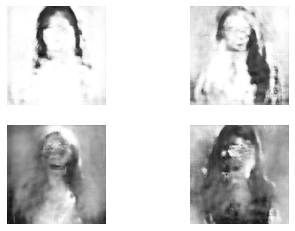

epoch:2351 d_loss:0.1195 g_loss:4.7214
epoch:2352 d_loss:0.0979 g_loss:4.9214
epoch:2353 d_loss:0.0861 g_loss:4.5077
epoch:2354 d_loss:0.0693 g_loss:4.3083
epoch:2355 d_loss:0.1159 g_loss:3.8605
epoch:2356 d_loss:0.0480 g_loss:5.0348
epoch:2357 d_loss:0.0594 g_loss:5.3510
epoch:2358 d_loss:0.0437 g_loss:5.0732
epoch:2359 d_loss:0.1118 g_loss:3.9570
epoch:2360 d_loss:0.1192 g_loss:4.9187
epoch:2361 d_loss:0.0941 g_loss:5.0101
epoch:2362 d_loss:0.1194 g_loss:3.9130
epoch:2363 d_loss:0.1267 g_loss:5.0510
epoch:2364 d_loss:0.0912 g_loss:4.8531
epoch:2365 d_loss:0.1410 g_loss:3.7192
epoch:2366 d_loss:0.0851 g_loss:4.8442
epoch:2367 d_loss:0.1402 g_loss:4.1398
epoch:2368 d_loss:0.0867 g_loss:4.5174
epoch:2369 d_loss:0.0943 g_loss:5.3009
epoch:2370 d_loss:0.1655 g_loss:3.8471
epoch:2371 d_loss:0.1426 g_loss:5.5042
epoch:2372 d_loss:0.1278 g_loss:5.0058
epoch:2373 d_loss:0.2444 g_loss:4.0825
epoch:2374 d_loss:0.0546 g_loss:5.7718
epoch:2375 d_loss:0.1909 g_loss:4.0566
epoch:2376 d_loss:0.2110 

<Figure size 720x576 with 0 Axes>

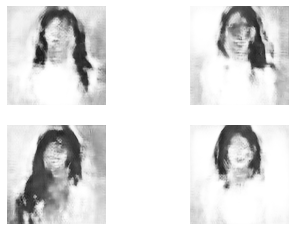

epoch:2401 d_loss:0.0981 g_loss:4.4210
epoch:2402 d_loss:0.0937 g_loss:4.6347
epoch:2403 d_loss:0.1735 g_loss:4.2312
epoch:2404 d_loss:0.0729 g_loss:5.2684
epoch:2405 d_loss:0.1616 g_loss:3.7926
epoch:2406 d_loss:0.0680 g_loss:5.3078
epoch:2407 d_loss:0.2503 g_loss:3.5289
epoch:2408 d_loss:0.0787 g_loss:6.3521
epoch:2409 d_loss:0.1380 g_loss:3.8529
epoch:2410 d_loss:0.1598 g_loss:4.6875
epoch:2411 d_loss:0.1298 g_loss:4.8591
epoch:2412 d_loss:0.1045 g_loss:4.3837
epoch:2413 d_loss:0.0994 g_loss:5.0083
epoch:2414 d_loss:0.0653 g_loss:5.4374
epoch:2415 d_loss:0.2841 g_loss:3.7512
epoch:2416 d_loss:0.1413 g_loss:6.0639
epoch:2417 d_loss:0.2272 g_loss:4.4478
epoch:2418 d_loss:0.2996 g_loss:4.9529
epoch:2419 d_loss:0.3889 g_loss:4.2073
epoch:2420 d_loss:0.2069 g_loss:4.5347
epoch:2421 d_loss:0.1965 g_loss:5.4052
epoch:2422 d_loss:0.3193 g_loss:3.9586
epoch:2423 d_loss:0.6669 g_loss:4.7663
epoch:2424 d_loss:0.5706 g_loss:4.2730
epoch:2425 d_loss:0.2822 g_loss:4.8500
epoch:2426 d_loss:0.1811 

<Figure size 720x576 with 0 Axes>

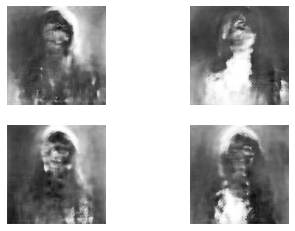

epoch:2451 d_loss:0.0890 g_loss:5.8175
epoch:2452 d_loss:0.0915 g_loss:6.7063
epoch:2453 d_loss:0.2116 g_loss:4.2478
epoch:2454 d_loss:0.1640 g_loss:4.2678
epoch:2455 d_loss:0.0582 g_loss:5.9271
epoch:2456 d_loss:0.1955 g_loss:3.8979
epoch:2457 d_loss:0.2456 g_loss:4.9172
epoch:2458 d_loss:0.1835 g_loss:4.8795
epoch:2459 d_loss:0.5469 g_loss:3.2430
epoch:2460 d_loss:0.0471 g_loss:6.7954
epoch:2461 d_loss:0.0693 g_loss:5.9390
epoch:2462 d_loss:0.2093 g_loss:5.6002
epoch:2463 d_loss:0.2225 g_loss:5.3009
epoch:2464 d_loss:0.3248 g_loss:4.9865
epoch:2465 d_loss:0.1936 g_loss:6.0347
epoch:2466 d_loss:0.1016 g_loss:6.0313
epoch:2467 d_loss:0.1317 g_loss:5.0606
epoch:2468 d_loss:0.0579 g_loss:5.7235
epoch:2469 d_loss:0.0555 g_loss:5.6525
epoch:2470 d_loss:0.2114 g_loss:3.6540
epoch:2471 d_loss:0.1895 g_loss:6.3010
epoch:2472 d_loss:0.1966 g_loss:4.6459
epoch:2473 d_loss:0.2195 g_loss:5.5019
epoch:2474 d_loss:0.0237 g_loss:10.1397
epoch:2475 d_loss:0.3714 g_loss:1.8811
epoch:2476 d_loss:0.8478

<Figure size 720x576 with 0 Axes>

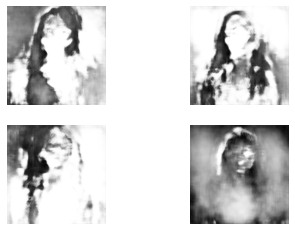

epoch:2501 d_loss:0.1971 g_loss:5.9948
epoch:2502 d_loss:0.1648 g_loss:4.8456
epoch:2503 d_loss:0.1156 g_loss:5.1207
epoch:2504 d_loss:0.1576 g_loss:5.1972
epoch:2505 d_loss:0.1911 g_loss:4.8421
epoch:2506 d_loss:0.1050 g_loss:5.8064
epoch:2507 d_loss:0.0386 g_loss:6.7207
epoch:2508 d_loss:0.0632 g_loss:5.8138
epoch:2509 d_loss:0.1096 g_loss:5.5619
epoch:2510 d_loss:0.0210 g_loss:7.9999
epoch:2511 d_loss:0.0879 g_loss:5.7934
epoch:2512 d_loss:0.1053 g_loss:5.8149
epoch:2513 d_loss:0.0227 g_loss:8.3650
epoch:2514 d_loss:0.1573 g_loss:5.1116
epoch:2515 d_loss:0.1102 g_loss:5.5079
epoch:2516 d_loss:0.0206 g_loss:8.2770
epoch:2517 d_loss:0.1966 g_loss:5.8584
epoch:2518 d_loss:0.0785 g_loss:5.1145
epoch:2519 d_loss:0.0520 g_loss:6.3543
epoch:2520 d_loss:0.1574 g_loss:6.1959
epoch:2521 d_loss:0.1271 g_loss:6.3549
epoch:2522 d_loss:0.2288 g_loss:7.0006
epoch:2523 d_loss:0.2366 g_loss:6.0489
epoch:2524 d_loss:0.1047 g_loss:6.9872
epoch:2525 d_loss:0.0899 g_loss:8.5224
epoch:2526 d_loss:0.2779 

<Figure size 720x576 with 0 Axes>

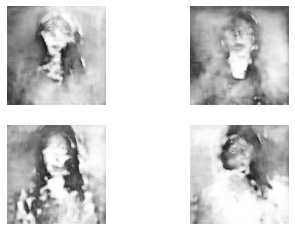

epoch:2551 d_loss:0.1862 g_loss:25.2893
epoch:2552 d_loss:3.2648 g_loss:13.0304
epoch:2553 d_loss:0.4955 g_loss:1.6990
epoch:2554 d_loss:3.1176 g_loss:8.4463
epoch:2555 d_loss:0.2973 g_loss:17.7183
epoch:2556 d_loss:2.7644 g_loss:1.0024
epoch:2557 d_loss:3.9347 g_loss:3.8780
epoch:2558 d_loss:0.0457 g_loss:20.0650
epoch:2559 d_loss:3.4168 g_loss:2.5539
epoch:2560 d_loss:2.3327 g_loss:5.3637
epoch:2561 d_loss:0.1151 g_loss:17.5536
epoch:2562 d_loss:2.4185 g_loss:4.1962
epoch:2563 d_loss:1.5729 g_loss:5.1288
epoch:2564 d_loss:0.0307 g_loss:15.9070
epoch:2565 d_loss:3.1261 g_loss:0.7395
epoch:2566 d_loss:2.8006 g_loss:6.8612
epoch:2567 d_loss:0.1131 g_loss:19.2132
epoch:2568 d_loss:3.4822 g_loss:9.7378
epoch:2569 d_loss:0.3906 g_loss:1.1505
epoch:2570 d_loss:2.0394 g_loss:8.5872
epoch:2571 d_loss:0.0868 g_loss:25.4064
epoch:2572 d_loss:5.4725 g_loss:2.4641
epoch:2573 d_loss:3.8391 g_loss:10.0934
epoch:2574 d_loss:0.8745 g_loss:16.1836
epoch:2575 d_loss:4.7614 g_loss:9.9973
epoch:2576 d_lo

<Figure size 720x576 with 0 Axes>

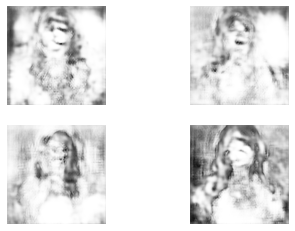

epoch:2601 d_loss:0.1814 g_loss:11.7760
epoch:2602 d_loss:0.3947 g_loss:6.2592
epoch:2603 d_loss:0.2288 g_loss:13.0092
epoch:2604 d_loss:0.1892 g_loss:11.5818
epoch:2605 d_loss:0.0578 g_loss:8.6492
epoch:2606 d_loss:0.1844 g_loss:11.5505
epoch:2607 d_loss:0.0651 g_loss:14.5938
epoch:2608 d_loss:0.3055 g_loss:3.3637
epoch:2609 d_loss:0.8013 g_loss:15.3054
epoch:2610 d_loss:0.2430 g_loss:30.1956
epoch:2611 d_loss:2.8036 g_loss:0.4348
epoch:2612 d_loss:3.7679 g_loss:24.0724
epoch:2613 d_loss:0.9843 g_loss:52.0609
epoch:2614 d_loss:7.1149 g_loss:16.5899
epoch:2615 d_loss:0.9012 g_loss:8.8811
epoch:2616 d_loss:0.4155 g_loss:17.0816
epoch:2617 d_loss:0.2822 g_loss:27.9689
epoch:2618 d_loss:1.7117 g_loss:13.4584
epoch:2619 d_loss:1.2635 g_loss:13.0906
epoch:2620 d_loss:0.4944 g_loss:19.9894
epoch:2621 d_loss:0.5359 g_loss:20.2334
epoch:2622 d_loss:1.0665 g_loss:7.4944
epoch:2623 d_loss:2.8928 g_loss:17.6272
epoch:2624 d_loss:0.9204 g_loss:32.5729
epoch:2625 d_loss:4.0403 g_loss:9.9640
epoch:2

<Figure size 720x576 with 0 Axes>

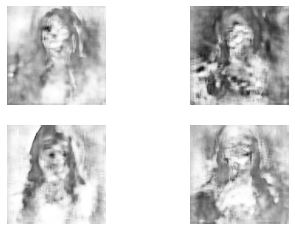

epoch:2651 d_loss:0.2210 g_loss:7.7736
epoch:2652 d_loss:0.4503 g_loss:4.7101
epoch:2653 d_loss:0.0517 g_loss:7.2929
epoch:2654 d_loss:0.1191 g_loss:6.0497
epoch:2655 d_loss:0.1377 g_loss:4.0156
epoch:2656 d_loss:0.1052 g_loss:5.9733
epoch:2657 d_loss:0.0764 g_loss:8.2428
epoch:2658 d_loss:0.3075 g_loss:3.3823
epoch:2659 d_loss:0.2526 g_loss:10.1902
epoch:2660 d_loss:0.3001 g_loss:13.1169
epoch:2661 d_loss:0.4860 g_loss:1.6576
epoch:2662 d_loss:1.4699 g_loss:14.8224
epoch:2663 d_loss:1.0913 g_loss:18.8227
epoch:2664 d_loss:2.1954 g_loss:3.7039
epoch:2665 d_loss:2.4791 g_loss:4.4345
epoch:2666 d_loss:0.1597 g_loss:15.1175
epoch:2667 d_loss:1.7896 g_loss:8.7639
epoch:2668 d_loss:1.4572 g_loss:2.3627
epoch:2669 d_loss:0.9284 g_loss:4.7615
epoch:2670 d_loss:0.2143 g_loss:9.8839
epoch:2671 d_loss:0.8193 g_loss:6.4628
epoch:2672 d_loss:0.1291 g_loss:3.8077
epoch:2673 d_loss:0.0604 g_loss:1.8723
epoch:2674 d_loss:0.2430 g_loss:2.1824
epoch:2675 d_loss:0.0910 g_loss:4.8206
epoch:2676 d_loss:0.

<Figure size 720x576 with 0 Axes>

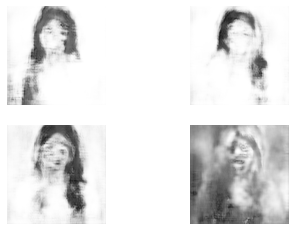

epoch:2701 d_loss:0.2149 g_loss:5.4937
epoch:2702 d_loss:0.5112 g_loss:3.2118
epoch:2703 d_loss:0.3160 g_loss:5.5908
epoch:2704 d_loss:0.4604 g_loss:5.3084
epoch:2705 d_loss:0.7003 g_loss:3.8745
epoch:2706 d_loss:0.2664 g_loss:4.7820
epoch:2707 d_loss:0.3411 g_loss:4.1428
epoch:2708 d_loss:0.2142 g_loss:3.9747
epoch:2709 d_loss:0.2171 g_loss:4.5864
epoch:2710 d_loss:0.4861 g_loss:3.2956
epoch:2711 d_loss:0.4037 g_loss:3.7807
epoch:2712 d_loss:0.3085 g_loss:3.2186
epoch:2713 d_loss:0.2669 g_loss:3.0478
epoch:2714 d_loss:0.1351 g_loss:3.8442
epoch:2715 d_loss:0.0403 g_loss:5.1281
epoch:2716 d_loss:0.1000 g_loss:4.2703
epoch:2717 d_loss:0.1108 g_loss:3.7245
epoch:2718 d_loss:0.0747 g_loss:5.1225
epoch:2719 d_loss:0.0855 g_loss:5.7224
epoch:2720 d_loss:0.2987 g_loss:3.4358
epoch:2721 d_loss:0.2487 g_loss:4.9477
epoch:2722 d_loss:0.1380 g_loss:5.9410
epoch:2723 d_loss:0.2866 g_loss:2.8952
epoch:2724 d_loss:0.3010 g_loss:3.1934
epoch:2725 d_loss:0.0390 g_loss:6.3030
epoch:2726 d_loss:0.2605 

<Figure size 720x576 with 0 Axes>

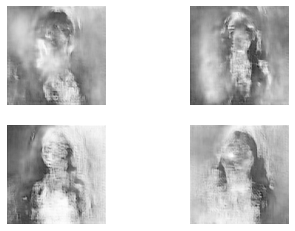

epoch:2751 d_loss:0.1719 g_loss:3.4592
epoch:2752 d_loss:0.2708 g_loss:5.1079
epoch:2753 d_loss:0.0981 g_loss:8.3445
epoch:2754 d_loss:0.5798 g_loss:2.0071
epoch:2755 d_loss:0.8331 g_loss:5.8260
epoch:2756 d_loss:0.4202 g_loss:8.9578
epoch:2757 d_loss:0.7493 g_loss:3.3676
epoch:2758 d_loss:0.8828 g_loss:4.6132
epoch:2759 d_loss:0.1157 g_loss:10.3529
epoch:2760 d_loss:0.9525 g_loss:6.3951
epoch:2761 d_loss:0.3676 g_loss:2.2717
epoch:2762 d_loss:0.4944 g_loss:4.4776
epoch:2763 d_loss:0.0988 g_loss:9.2348
epoch:2764 d_loss:0.7429 g_loss:1.9971
epoch:2765 d_loss:0.6833 g_loss:2.9275
epoch:2766 d_loss:0.0815 g_loss:7.0549
epoch:2767 d_loss:0.4352 g_loss:5.9112
epoch:2768 d_loss:0.3686 g_loss:2.3699
epoch:2769 d_loss:0.4431 g_loss:2.7469
epoch:2770 d_loss:0.1415 g_loss:5.5857
epoch:2771 d_loss:0.3022 g_loss:5.7787
epoch:2772 d_loss:0.3108 g_loss:3.4688
epoch:2773 d_loss:0.3527 g_loss:2.7096
epoch:2774 d_loss:0.1686 g_loss:4.4303
epoch:2775 d_loss:0.1759 g_loss:5.0016
epoch:2776 d_loss:0.1694

<Figure size 720x576 with 0 Axes>

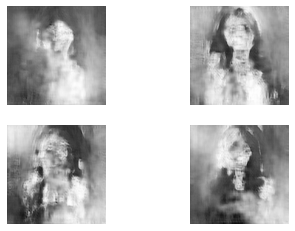

epoch:2801 d_loss:0.1998 g_loss:4.0538
epoch:2802 d_loss:0.4050 g_loss:2.4679
epoch:2803 d_loss:0.3137 g_loss:4.1376
epoch:2804 d_loss:0.2068 g_loss:5.1802
epoch:2805 d_loss:0.5001 g_loss:2.2297
epoch:2806 d_loss:0.3984 g_loss:3.4984
epoch:2807 d_loss:0.1513 g_loss:6.1099
epoch:2808 d_loss:0.2728 g_loss:4.4107
epoch:2809 d_loss:0.1858 g_loss:3.1956
epoch:2810 d_loss:0.1546 g_loss:4.4561
epoch:2811 d_loss:0.1150 g_loss:5.3935
epoch:2812 d_loss:0.1697 g_loss:4.3081
epoch:2813 d_loss:0.1205 g_loss:3.4731
epoch:2814 d_loss:0.1466 g_loss:4.0149
epoch:2815 d_loss:0.0950 g_loss:5.3255
epoch:2816 d_loss:0.2144 g_loss:3.4979
epoch:2817 d_loss:0.2593 g_loss:3.4848
epoch:2818 d_loss:0.2505 g_loss:3.6498
epoch:2819 d_loss:0.1278 g_loss:4.5678
epoch:2820 d_loss:0.1296 g_loss:4.3746
epoch:2821 d_loss:0.1311 g_loss:4.6356
epoch:2822 d_loss:0.2080 g_loss:3.6174
epoch:2823 d_loss:0.1447 g_loss:4.4827
epoch:2824 d_loss:0.1928 g_loss:4.2192
epoch:2825 d_loss:0.2247 g_loss:5.4606
epoch:2826 d_loss:0.2235 

<Figure size 720x576 with 0 Axes>

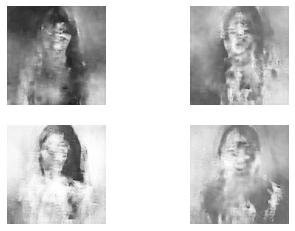

epoch:2851 d_loss:0.2527 g_loss:3.2841
epoch:2852 d_loss:0.3024 g_loss:4.2286
epoch:2853 d_loss:0.1048 g_loss:7.1409
epoch:2854 d_loss:0.3314 g_loss:5.3497
epoch:2855 d_loss:0.1423 g_loss:3.7647
epoch:2856 d_loss:0.1444 g_loss:3.6116
epoch:2857 d_loss:0.1337 g_loss:5.2684
epoch:2858 d_loss:0.1061 g_loss:6.1709
epoch:2859 d_loss:0.2012 g_loss:4.2387
epoch:2860 d_loss:0.2054 g_loss:3.0056
epoch:2861 d_loss:0.2128 g_loss:4.4965
epoch:2862 d_loss:0.1095 g_loss:5.6941
epoch:2863 d_loss:0.3493 g_loss:3.0761
epoch:2864 d_loss:0.2854 g_loss:3.4270
epoch:2865 d_loss:0.1894 g_loss:5.0166
epoch:2866 d_loss:0.2591 g_loss:4.1072
epoch:2867 d_loss:0.1227 g_loss:4.0722
epoch:2868 d_loss:0.1583 g_loss:4.3659
epoch:2869 d_loss:0.1002 g_loss:5.3581
epoch:2870 d_loss:0.4081 g_loss:3.1782
epoch:2871 d_loss:0.2830 g_loss:4.8895
epoch:2872 d_loss:0.3773 g_loss:4.8722
epoch:2873 d_loss:0.4973 g_loss:4.0459
epoch:2874 d_loss:0.1788 g_loss:4.8484
epoch:2875 d_loss:0.1259 g_loss:5.2485
epoch:2876 d_loss:0.1854 

<Figure size 720x576 with 0 Axes>

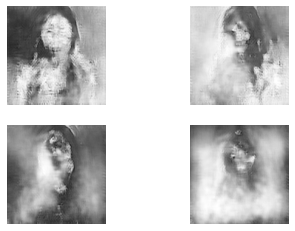

epoch:2901 d_loss:0.3234 g_loss:4.1742
epoch:2902 d_loss:0.1578 g_loss:4.3234
epoch:2903 d_loss:0.2610 g_loss:5.6651
epoch:2904 d_loss:0.4099 g_loss:3.2398
epoch:2905 d_loss:0.2757 g_loss:4.9604
epoch:2906 d_loss:0.1999 g_loss:5.5427
epoch:2907 d_loss:0.3169 g_loss:3.2609
epoch:2908 d_loss:0.2678 g_loss:5.4755
epoch:2909 d_loss:0.2100 g_loss:5.4486
epoch:2910 d_loss:0.5793 g_loss:3.8363
epoch:2911 d_loss:0.1239 g_loss:5.3157
epoch:2912 d_loss:0.4908 g_loss:5.2331
epoch:2913 d_loss:0.1265 g_loss:5.9210
epoch:2914 d_loss:0.1911 g_loss:3.6350
epoch:2915 d_loss:0.1302 g_loss:6.1869
epoch:2916 d_loss:0.1327 g_loss:5.9318
epoch:2917 d_loss:0.1198 g_loss:4.8340
epoch:2918 d_loss:0.1619 g_loss:4.3980
epoch:2919 d_loss:0.1247 g_loss:6.0433
epoch:2920 d_loss:0.1965 g_loss:5.2620
epoch:2921 d_loss:0.2535 g_loss:4.5485
epoch:2922 d_loss:0.1746 g_loss:5.7665
epoch:2923 d_loss:0.1034 g_loss:5.7817
epoch:2924 d_loss:0.1208 g_loss:5.1888
epoch:2925 d_loss:0.1792 g_loss:4.4989
epoch:2926 d_loss:0.1903 

<Figure size 720x576 with 0 Axes>

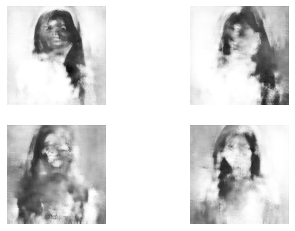

epoch:2951 d_loss:0.1596 g_loss:5.9674
epoch:2952 d_loss:0.1375 g_loss:7.6447
epoch:2953 d_loss:0.2306 g_loss:3.7388
epoch:2954 d_loss:0.2865 g_loss:5.0603
epoch:2955 d_loss:0.0236 g_loss:8.5963
epoch:2956 d_loss:0.6624 g_loss:1.7414
epoch:2957 d_loss:0.7009 g_loss:6.7847
epoch:2958 d_loss:0.3731 g_loss:8.4870
epoch:2959 d_loss:0.7464 g_loss:1.9713
epoch:2960 d_loss:0.8088 g_loss:5.5797
epoch:2961 d_loss:0.1039 g_loss:13.2108
epoch:2962 d_loss:1.2292 g_loss:3.0107
epoch:2963 d_loss:0.7996 g_loss:3.5543
epoch:2964 d_loss:0.2575 g_loss:7.8195
epoch:2965 d_loss:1.4480 g_loss:2.5047
epoch:2966 d_loss:1.4450 g_loss:4.5568
epoch:2967 d_loss:0.3010 g_loss:8.2740
epoch:2968 d_loss:1.0893 g_loss:1.8118
epoch:2969 d_loss:0.7108 g_loss:5.4548
epoch:2970 d_loss:0.1096 g_loss:12.6131
epoch:2971 d_loss:1.3075 g_loss:4.5934
epoch:2972 d_loss:0.2493 g_loss:1.8800
epoch:2973 d_loss:0.3897 g_loss:4.8939
epoch:2974 d_loss:0.0250 g_loss:10.9982
epoch:2975 d_loss:0.5308 g_loss:6.7867
epoch:2976 d_loss:0.17

<Figure size 720x576 with 0 Axes>

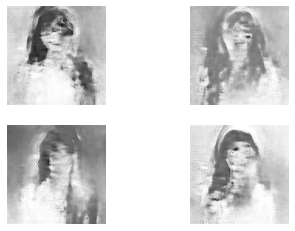

epoch:3001 d_loss:0.4770 g_loss:2.8127
epoch:3002 d_loss:0.3687 g_loss:6.3466
epoch:3003 d_loss:0.3574 g_loss:5.6566
epoch:3004 d_loss:0.8561 g_loss:2.8263
epoch:3005 d_loss:0.1647 g_loss:6.0135
epoch:3006 d_loss:0.5863 g_loss:4.2683
epoch:3007 d_loss:0.2655 g_loss:5.6036
epoch:3008 d_loss:0.1151 g_loss:7.2737
epoch:3009 d_loss:0.2702 g_loss:4.4578
epoch:3010 d_loss:0.1409 g_loss:6.2803
epoch:3011 d_loss:0.1133 g_loss:6.8982
epoch:3012 d_loss:0.2448 g_loss:3.5896
epoch:3013 d_loss:0.2081 g_loss:6.5378
epoch:3014 d_loss:0.1191 g_loss:9.6487
epoch:3015 d_loss:0.4449 g_loss:1.4856
epoch:3016 d_loss:1.4649 g_loss:8.4089
epoch:3017 d_loss:0.4803 g_loss:13.7916
epoch:3018 d_loss:2.2191 g_loss:0.6839
epoch:3019 d_loss:2.8972 g_loss:0.9532
epoch:3020 d_loss:0.0475 g_loss:9.1969
epoch:3021 d_loss:1.2089 g_loss:6.6224
epoch:3022 d_loss:0.6345 g_loss:2.2329
epoch:3023 d_loss:0.6147 g_loss:2.1316
epoch:3024 d_loss:0.1556 g_loss:4.7298
epoch:3025 d_loss:0.3408 g_loss:5.3250
epoch:3026 d_loss:0.3154

<Figure size 720x576 with 0 Axes>

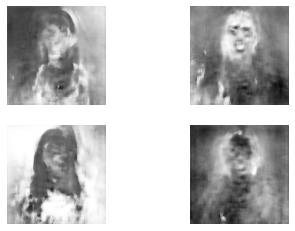

epoch:3051 d_loss:0.3496 g_loss:2.7744
epoch:3052 d_loss:0.1241 g_loss:5.1138
epoch:3053 d_loss:0.1428 g_loss:6.0534
epoch:3054 d_loss:0.2354 g_loss:3.1937
epoch:3055 d_loss:0.2115 g_loss:2.5423
epoch:3056 d_loss:0.0417 g_loss:3.9226
epoch:3057 d_loss:0.0849 g_loss:3.3767
epoch:3058 d_loss:0.0643 g_loss:2.2321
epoch:3059 d_loss:0.3570 g_loss:3.4641
epoch:3060 d_loss:0.1166 g_loss:5.8699
epoch:3061 d_loss:0.9989 g_loss:1.2095
epoch:3062 d_loss:0.3514 g_loss:3.8341
epoch:3063 d_loss:0.2062 g_loss:7.2663
epoch:3064 d_loss:0.8607 g_loss:2.3355
epoch:3065 d_loss:0.6545 g_loss:2.4622
epoch:3066 d_loss:0.0639 g_loss:6.6812
epoch:3067 d_loss:0.2435 g_loss:6.1779
epoch:3068 d_loss:0.3040 g_loss:3.2202
epoch:3069 d_loss:0.2083 g_loss:1.9926
epoch:3070 d_loss:0.2534 g_loss:3.3239
epoch:3071 d_loss:0.0898 g_loss:5.4035
epoch:3072 d_loss:0.1909 g_loss:4.5716
epoch:3073 d_loss:0.2270 g_loss:2.1344
epoch:3074 d_loss:0.4387 g_loss:2.8439
epoch:3075 d_loss:0.1462 g_loss:5.0575
epoch:3076 d_loss:0.4278 

<Figure size 720x576 with 0 Axes>

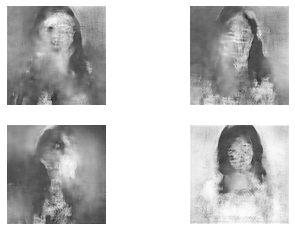

epoch:3101 d_loss:0.1227 g_loss:5.3470
epoch:3102 d_loss:0.1565 g_loss:5.3085
epoch:3103 d_loss:0.6173 g_loss:4.6562
epoch:3104 d_loss:0.1552 g_loss:5.5102
epoch:3105 d_loss:1.1954 g_loss:3.5634
epoch:3106 d_loss:0.1697 g_loss:5.8127
epoch:3107 d_loss:0.7799 g_loss:2.7472
epoch:3108 d_loss:0.5020 g_loss:4.8048
epoch:3109 d_loss:0.2121 g_loss:7.0826
epoch:3110 d_loss:0.5292 g_loss:2.8339
epoch:3111 d_loss:0.3068 g_loss:3.5686
epoch:3112 d_loss:0.0709 g_loss:7.4534
epoch:3113 d_loss:0.3127 g_loss:4.0255
epoch:3114 d_loss:0.1242 g_loss:3.2850
epoch:3115 d_loss:0.0598 g_loss:5.3111
epoch:3116 d_loss:0.0153 g_loss:8.0664
epoch:3117 d_loss:0.1099 g_loss:5.4952
epoch:3118 d_loss:0.0981 g_loss:3.6767
epoch:3119 d_loss:0.1857 g_loss:4.5168
epoch:3120 d_loss:0.1195 g_loss:5.5445
epoch:3121 d_loss:0.1862 g_loss:5.3520
epoch:3122 d_loss:0.2655 g_loss:4.1517
epoch:3123 d_loss:0.1743 g_loss:4.1378
epoch:3124 d_loss:0.2126 g_loss:5.4657
epoch:3125 d_loss:0.1459 g_loss:5.5320
epoch:3126 d_loss:0.4385 

<Figure size 720x576 with 0 Axes>

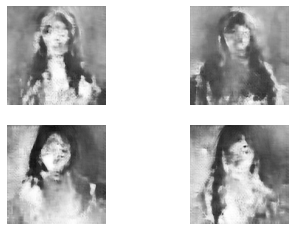

epoch:3151 d_loss:0.1029 g_loss:5.8494
epoch:3152 d_loss:0.0805 g_loss:6.3610
epoch:3153 d_loss:0.1346 g_loss:5.0619
epoch:3154 d_loss:0.1161 g_loss:3.9139
epoch:3155 d_loss:0.1212 g_loss:4.3138
epoch:3156 d_loss:0.1227 g_loss:5.5644
epoch:3157 d_loss:0.1070 g_loss:6.0255
epoch:3158 d_loss:0.2189 g_loss:4.5701
epoch:3159 d_loss:0.1645 g_loss:3.7307
epoch:3160 d_loss:0.1914 g_loss:4.6246
epoch:3161 d_loss:0.3204 g_loss:4.2468
epoch:3162 d_loss:0.2377 g_loss:4.3493
epoch:3163 d_loss:0.1672 g_loss:3.8790
epoch:3164 d_loss:0.1160 g_loss:3.7841
epoch:3165 d_loss:0.1086 g_loss:5.1532
epoch:3166 d_loss:0.1667 g_loss:4.4793
epoch:3167 d_loss:0.3058 g_loss:4.9957
epoch:3168 d_loss:0.4025 g_loss:3.8533
epoch:3169 d_loss:0.1556 g_loss:4.3052
epoch:3170 d_loss:0.1102 g_loss:5.7044
epoch:3171 d_loss:0.1531 g_loss:3.6415
epoch:3172 d_loss:0.2451 g_loss:4.6180
epoch:3173 d_loss:0.2783 g_loss:3.6062
epoch:3174 d_loss:0.3337 g_loss:3.9783
epoch:3175 d_loss:0.2117 g_loss:3.7606
epoch:3176 d_loss:0.1351 

<Figure size 720x576 with 0 Axes>

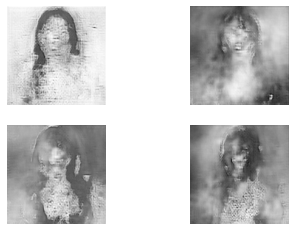

epoch:3201 d_loss:0.0325 g_loss:6.7014
epoch:3202 d_loss:0.0712 g_loss:5.6034
epoch:3203 d_loss:0.1185 g_loss:4.1069
epoch:3204 d_loss:0.1016 g_loss:5.4115
epoch:3205 d_loss:0.1503 g_loss:5.0753
epoch:3206 d_loss:0.2474 g_loss:4.4278
epoch:3207 d_loss:0.1051 g_loss:6.3663
epoch:3208 d_loss:0.3268 g_loss:5.1237
epoch:3209 d_loss:0.0921 g_loss:4.9178
epoch:3210 d_loss:0.1740 g_loss:5.8331
epoch:3211 d_loss:0.0929 g_loss:6.0709
epoch:3212 d_loss:0.0889 g_loss:5.1590
epoch:3213 d_loss:0.0894 g_loss:5.8586
epoch:3214 d_loss:0.1740 g_loss:5.1526
epoch:3215 d_loss:0.1278 g_loss:5.0647
epoch:3216 d_loss:0.1689 g_loss:4.4499
epoch:3217 d_loss:0.1333 g_loss:4.7885
epoch:3218 d_loss:0.1134 g_loss:4.7235
epoch:3219 d_loss:0.0839 g_loss:5.0910
epoch:3220 d_loss:0.0879 g_loss:6.0733
epoch:3221 d_loss:0.5255 g_loss:5.9495
epoch:3222 d_loss:0.3279 g_loss:5.1139
epoch:3223 d_loss:0.4535 g_loss:4.7851
epoch:3224 d_loss:0.1936 g_loss:5.3818
epoch:3225 d_loss:0.1784 g_loss:4.9498
epoch:3226 d_loss:0.1370 

<Figure size 720x576 with 0 Axes>

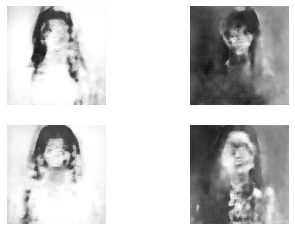

epoch:3251 d_loss:0.4006 g_loss:6.7447
epoch:3252 d_loss:0.3441 g_loss:8.8880
epoch:3253 d_loss:0.4184 g_loss:3.7272
epoch:3254 d_loss:0.7443 g_loss:6.7265
epoch:3255 d_loss:0.0237 g_loss:11.8483
epoch:3256 d_loss:0.4850 g_loss:3.3629
epoch:3257 d_loss:0.5050 g_loss:2.8892
epoch:3258 d_loss:0.1585 g_loss:7.0792
epoch:3259 d_loss:0.3505 g_loss:7.9388
epoch:3260 d_loss:0.2611 g_loss:3.0518
epoch:3261 d_loss:0.5387 g_loss:4.8784
epoch:3262 d_loss:0.0636 g_loss:11.1084
epoch:3263 d_loss:0.9633 g_loss:4.1650
epoch:3264 d_loss:0.6563 g_loss:3.7775
epoch:3265 d_loss:0.1743 g_loss:8.4733
epoch:3266 d_loss:0.3834 g_loss:9.0687
epoch:3267 d_loss:0.4471 g_loss:4.7621
epoch:3268 d_loss:0.2632 g_loss:4.5127
epoch:3269 d_loss:0.1504 g_loss:6.7910
epoch:3270 d_loss:0.0880 g_loss:7.7011
epoch:3271 d_loss:0.1339 g_loss:6.1631
epoch:3272 d_loss:0.1475 g_loss:4.3405
epoch:3273 d_loss:0.1806 g_loss:4.8926
epoch:3274 d_loss:0.1254 g_loss:5.2189
epoch:3275 d_loss:0.1963 g_loss:4.1105
epoch:3276 d_loss:0.239

<Figure size 720x576 with 0 Axes>

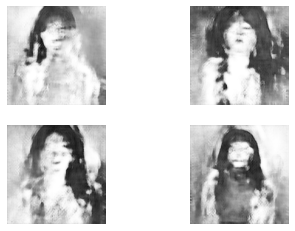

epoch:3301 d_loss:0.1329 g_loss:6.6564
epoch:3302 d_loss:0.2694 g_loss:6.5702
epoch:3303 d_loss:0.3920 g_loss:4.5516
epoch:3304 d_loss:0.1303 g_loss:6.1030
epoch:3305 d_loss:0.1197 g_loss:7.6931
epoch:3306 d_loss:0.0848 g_loss:6.8349
epoch:3307 d_loss:0.1245 g_loss:4.9446
epoch:3308 d_loss:0.0961 g_loss:5.9608
epoch:3309 d_loss:0.1348 g_loss:6.5010
epoch:3310 d_loss:0.1299 g_loss:5.4503
epoch:3311 d_loss:0.1097 g_loss:5.0234
epoch:3312 d_loss:0.1315 g_loss:4.6339
epoch:3313 d_loss:0.2542 g_loss:4.7756
epoch:3314 d_loss:0.0913 g_loss:5.4061
epoch:3315 d_loss:0.1287 g_loss:4.9313
epoch:3316 d_loss:0.0741 g_loss:5.5243
epoch:3317 d_loss:0.1040 g_loss:5.6993
epoch:3318 d_loss:0.0815 g_loss:5.7031
epoch:3319 d_loss:0.0924 g_loss:6.0041
epoch:3320 d_loss:0.1463 g_loss:4.9400
epoch:3321 d_loss:0.0811 g_loss:5.5847
epoch:3322 d_loss:0.2132 g_loss:4.5589
epoch:3323 d_loss:0.1585 g_loss:4.7018
epoch:3324 d_loss:0.2037 g_loss:5.5703
epoch:3325 d_loss:0.1735 g_loss:5.0439
epoch:3326 d_loss:0.1251 

<Figure size 720x576 with 0 Axes>

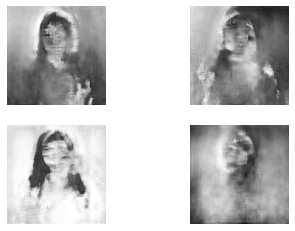

epoch:3351 d_loss:0.2857 g_loss:4.9505
epoch:3352 d_loss:0.5094 g_loss:3.5110
epoch:3353 d_loss:0.2486 g_loss:4.2336
epoch:3354 d_loss:0.2972 g_loss:3.2145
epoch:3355 d_loss:0.0542 g_loss:4.2967
epoch:3356 d_loss:0.0906 g_loss:4.3037
epoch:3357 d_loss:0.0897 g_loss:5.0496
epoch:3358 d_loss:0.2012 g_loss:4.5339
epoch:3359 d_loss:0.2237 g_loss:4.1772
epoch:3360 d_loss:0.1913 g_loss:4.5400
epoch:3361 d_loss:0.1792 g_loss:4.8286
epoch:3362 d_loss:0.0947 g_loss:6.3310
epoch:3363 d_loss:0.1492 g_loss:4.7282
epoch:3364 d_loss:0.1947 g_loss:4.2498
epoch:3365 d_loss:0.1069 g_loss:6.2000
epoch:3366 d_loss:0.1692 g_loss:5.6794
epoch:3367 d_loss:0.4053 g_loss:3.6825
epoch:3368 d_loss:0.1147 g_loss:5.4057
epoch:3369 d_loss:0.1572 g_loss:4.4545
epoch:3370 d_loss:0.1934 g_loss:3.5964
epoch:3371 d_loss:0.0902 g_loss:4.8119
epoch:3372 d_loss:0.0857 g_loss:5.5593
epoch:3373 d_loss:0.2913 g_loss:3.2504
epoch:3374 d_loss:0.1260 g_loss:5.3967
epoch:3375 d_loss:0.0903 g_loss:6.4477
epoch:3376 d_loss:0.1903 

<Figure size 720x576 with 0 Axes>

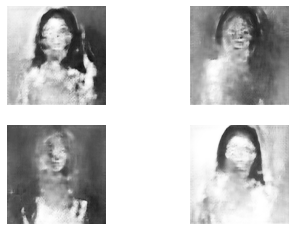

epoch:3401 d_loss:0.2319 g_loss:5.6172
epoch:3402 d_loss:0.1108 g_loss:5.3794
epoch:3403 d_loss:0.0646 g_loss:5.1542
epoch:3404 d_loss:0.1045 g_loss:5.5725
epoch:3405 d_loss:0.0824 g_loss:6.0692
epoch:3406 d_loss:0.3963 g_loss:2.9242
epoch:3407 d_loss:0.1684 g_loss:5.2489
epoch:3408 d_loss:0.1092 g_loss:7.4192
epoch:3409 d_loss:0.3076 g_loss:2.7431
epoch:3410 d_loss:0.3333 g_loss:4.7566
epoch:3411 d_loss:0.0450 g_loss:9.7894
epoch:3412 d_loss:0.4398 g_loss:4.2421
epoch:3413 d_loss:0.3680 g_loss:3.6674
epoch:3414 d_loss:0.0355 g_loss:7.3790
epoch:3415 d_loss:0.2538 g_loss:6.0067
epoch:3416 d_loss:0.2082 g_loss:3.4597
epoch:3417 d_loss:0.2652 g_loss:4.7667
epoch:3418 d_loss:0.1354 g_loss:7.4543
epoch:3419 d_loss:0.2292 g_loss:6.5713
epoch:3420 d_loss:0.3689 g_loss:3.7931
epoch:3421 d_loss:0.2307 g_loss:4.8523
epoch:3422 d_loss:0.0797 g_loss:7.8680
epoch:3423 d_loss:0.2694 g_loss:4.0113
epoch:3424 d_loss:0.3165 g_loss:5.1867
epoch:3425 d_loss:0.0872 g_loss:8.5237
epoch:3426 d_loss:0.4203 

<Figure size 720x576 with 0 Axes>

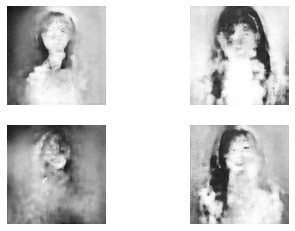

epoch:3451 d_loss:0.0618 g_loss:11.7186
epoch:3452 d_loss:0.9677 g_loss:1.9880
epoch:3453 d_loss:0.5479 g_loss:9.0328
epoch:3454 d_loss:0.7158 g_loss:8.4296
epoch:3455 d_loss:0.9770 g_loss:3.7320
epoch:3456 d_loss:0.4141 g_loss:5.5634
epoch:3457 d_loss:0.2097 g_loss:7.4172
epoch:3458 d_loss:0.5002 g_loss:3.2628
epoch:3459 d_loss:0.2512 g_loss:3.8363
epoch:3460 d_loss:0.0776 g_loss:6.3172
epoch:3461 d_loss:0.3321 g_loss:3.3022
epoch:3462 d_loss:0.2927 g_loss:4.1996
epoch:3463 d_loss:0.1122 g_loss:6.3866
epoch:3464 d_loss:0.3675 g_loss:3.8909
epoch:3465 d_loss:0.1467 g_loss:3.6732
epoch:3466 d_loss:0.0593 g_loss:5.6491
epoch:3467 d_loss:0.1271 g_loss:5.0293
epoch:3468 d_loss:0.1287 g_loss:4.1782
epoch:3469 d_loss:0.0639 g_loss:5.0975
epoch:3470 d_loss:0.1163 g_loss:4.9490
epoch:3471 d_loss:0.1580 g_loss:4.6869
epoch:3472 d_loss:0.3119 g_loss:3.7435
epoch:3473 d_loss:0.1886 g_loss:4.9822
epoch:3474 d_loss:0.1258 g_loss:5.0663
epoch:3475 d_loss:0.2581 g_loss:4.4239
epoch:3476 d_loss:0.1858

<Figure size 720x576 with 0 Axes>

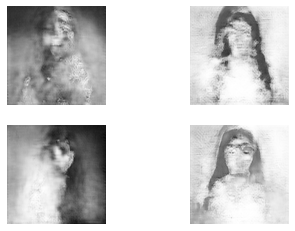

epoch:3501 d_loss:1.3371 g_loss:6.5531
epoch:3502 d_loss:0.7440 g_loss:2.6269
epoch:3503 d_loss:0.3006 g_loss:6.4184
epoch:3504 d_loss:0.5750 g_loss:5.2520
epoch:3505 d_loss:0.1164 g_loss:5.6121
epoch:3506 d_loss:0.0758 g_loss:5.6364
epoch:3507 d_loss:0.2018 g_loss:5.9400
epoch:3508 d_loss:0.1117 g_loss:6.7341
epoch:3509 d_loss:0.3715 g_loss:3.3833
epoch:3510 d_loss:0.1690 g_loss:4.4405
epoch:3511 d_loss:0.2542 g_loss:3.7694
epoch:3512 d_loss:0.1333 g_loss:4.6404
epoch:3513 d_loss:0.1359 g_loss:4.1419
epoch:3514 d_loss:0.1004 g_loss:3.9404
epoch:3515 d_loss:0.1143 g_loss:4.1303
epoch:3516 d_loss:0.1099 g_loss:5.5343
epoch:3517 d_loss:0.1079 g_loss:5.1398
epoch:3518 d_loss:0.1747 g_loss:4.0092
epoch:3519 d_loss:0.3701 g_loss:6.6095
epoch:3520 d_loss:0.3494 g_loss:5.8419
epoch:3521 d_loss:0.2179 g_loss:4.1903
epoch:3522 d_loss:0.0887 g_loss:4.7380
epoch:3523 d_loss:0.1073 g_loss:5.7823
epoch:3524 d_loss:0.1847 g_loss:5.0971
epoch:3525 d_loss:0.1911 g_loss:4.6466
epoch:3526 d_loss:0.1644 

<Figure size 720x576 with 0 Axes>

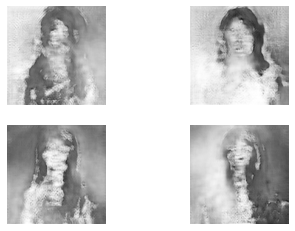

epoch:3551 d_loss:0.2259 g_loss:5.7096
epoch:3552 d_loss:0.7193 g_loss:6.9894
epoch:3553 d_loss:0.4534 g_loss:5.2753
epoch:3554 d_loss:0.1997 g_loss:5.6386
epoch:3555 d_loss:0.1771 g_loss:5.7028
epoch:3556 d_loss:0.0834 g_loss:6.2677
epoch:3557 d_loss:0.0806 g_loss:5.9199
epoch:3558 d_loss:0.1204 g_loss:5.1945
epoch:3559 d_loss:0.0773 g_loss:6.2298
epoch:3560 d_loss:0.1961 g_loss:4.4432
epoch:3561 d_loss:0.1996 g_loss:5.4026
epoch:3562 d_loss:0.0761 g_loss:6.9901
epoch:3563 d_loss:0.2259 g_loss:3.1740
epoch:3564 d_loss:0.2143 g_loss:4.2813
epoch:3565 d_loss:0.0535 g_loss:7.3538
epoch:3566 d_loss:0.0999 g_loss:5.9446
epoch:3567 d_loss:0.0707 g_loss:4.0417
epoch:3568 d_loss:0.1650 g_loss:4.6927
epoch:3569 d_loss:0.0446 g_loss:7.1602
epoch:3570 d_loss:0.3004 g_loss:2.8069
epoch:3571 d_loss:0.2744 g_loss:5.8476
epoch:3572 d_loss:0.0348 g_loss:11.0918
epoch:3573 d_loss:0.5806 g_loss:4.2590
epoch:3574 d_loss:0.4313 g_loss:4.8930
epoch:3575 d_loss:0.0291 g_loss:11.1656
epoch:3576 d_loss:0.436

<Figure size 720x576 with 0 Axes>

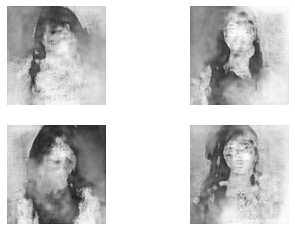

epoch:3601 d_loss:0.0682 g_loss:8.7367
epoch:3602 d_loss:0.2778 g_loss:1.9592
epoch:3603 d_loss:0.4027 g_loss:7.9757
epoch:3604 d_loss:0.1260 g_loss:16.4681
epoch:3605 d_loss:1.3493 g_loss:4.4569
epoch:3606 d_loss:0.5364 g_loss:4.4636
epoch:3607 d_loss:0.0410 g_loss:10.9525
epoch:3608 d_loss:0.3238 g_loss:11.5067
epoch:3609 d_loss:0.2413 g_loss:7.4416
epoch:3610 d_loss:0.2866 g_loss:3.5883
epoch:3611 d_loss:0.5622 g_loss:6.6357
epoch:3612 d_loss:0.1324 g_loss:12.4662
epoch:3613 d_loss:0.6008 g_loss:7.1265
epoch:3614 d_loss:0.4916 g_loss:3.0598
epoch:3615 d_loss:0.6417 g_loss:6.4915
epoch:3616 d_loss:0.1926 g_loss:11.7344
epoch:3617 d_loss:0.9038 g_loss:2.7832
epoch:3618 d_loss:1.2464 g_loss:5.9979
epoch:3619 d_loss:0.0367 g_loss:14.5294
epoch:3620 d_loss:2.3335 g_loss:1.5934
epoch:3621 d_loss:0.8430 g_loss:6.7909
epoch:3622 d_loss:0.1246 g_loss:19.5209
epoch:3623 d_loss:2.5284 g_loss:1.6410
epoch:3624 d_loss:3.4386 g_loss:6.2785
epoch:3625 d_loss:0.1745 g_loss:25.3759
epoch:3626 d_loss

<Figure size 720x576 with 0 Axes>

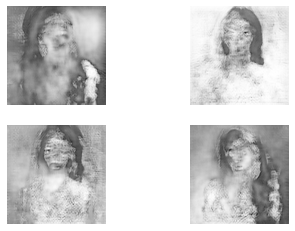

epoch:3651 d_loss:2.4203 g_loss:4.3708
epoch:3652 d_loss:0.9764 g_loss:10.1546
epoch:3653 d_loss:1.8724 g_loss:6.4996
epoch:3654 d_loss:3.5901 g_loss:2.4022
epoch:3655 d_loss:0.0385 g_loss:14.5824
epoch:3656 d_loss:2.7620 g_loss:4.2029
epoch:3657 d_loss:1.5370 g_loss:3.3568
epoch:3658 d_loss:0.5620 g_loss:7.4168
epoch:3659 d_loss:0.7469 g_loss:7.7982
epoch:3660 d_loss:0.4739 g_loss:6.3818
epoch:3661 d_loss:0.3015 g_loss:7.8188
epoch:3662 d_loss:0.1908 g_loss:9.5426
epoch:3663 d_loss:0.1206 g_loss:10.8176
epoch:3664 d_loss:0.2746 g_loss:8.5862
epoch:3665 d_loss:0.2289 g_loss:7.8906
epoch:3666 d_loss:1.3129 g_loss:9.6993
epoch:3667 d_loss:0.7229 g_loss:6.8046
epoch:3668 d_loss:0.7437 g_loss:4.9403
epoch:3669 d_loss:0.1871 g_loss:8.3669
epoch:3670 d_loss:0.6188 g_loss:4.0208
epoch:3671 d_loss:0.3479 g_loss:7.5173
epoch:3672 d_loss:0.1709 g_loss:12.5710
epoch:3673 d_loss:0.5590 g_loss:4.2131
epoch:3674 d_loss:0.6958 g_loss:8.6854
epoch:3675 d_loss:0.1513 g_loss:20.1530
epoch:3676 d_loss:1.

<Figure size 720x576 with 0 Axes>

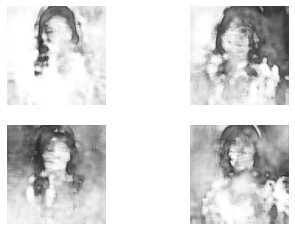

epoch:3701 d_loss:0.9652 g_loss:3.9119
epoch:3702 d_loss:0.5925 g_loss:4.7326
epoch:3703 d_loss:0.0448 g_loss:10.8691
epoch:3704 d_loss:0.3784 g_loss:8.9992
epoch:3705 d_loss:0.2799 g_loss:4.3083
epoch:3706 d_loss:0.5183 g_loss:6.0118
epoch:3707 d_loss:0.1055 g_loss:12.3054
epoch:3708 d_loss:0.7446 g_loss:5.6452
epoch:3709 d_loss:0.3312 g_loss:4.8349
epoch:3710 d_loss:0.2932 g_loss:7.5731
epoch:3711 d_loss:0.3163 g_loss:8.5025
epoch:3712 d_loss:0.5117 g_loss:5.4071
epoch:3713 d_loss:0.2798 g_loss:6.1089
epoch:3714 d_loss:0.2954 g_loss:7.8974
epoch:3715 d_loss:0.2352 g_loss:7.4004
epoch:3716 d_loss:0.3234 g_loss:4.9423
epoch:3717 d_loss:0.2778 g_loss:6.2304
epoch:3718 d_loss:0.3620 g_loss:5.9479
epoch:3719 d_loss:0.4622 g_loss:3.8551
epoch:3720 d_loss:0.2413 g_loss:5.3872
epoch:3721 d_loss:0.2626 g_loss:5.3823
epoch:3722 d_loss:0.3017 g_loss:3.5875
epoch:3723 d_loss:0.2691 g_loss:6.4942
epoch:3724 d_loss:0.3578 g_loss:3.6875
epoch:3725 d_loss:0.4492 g_loss:5.3370
epoch:3726 d_loss:0.196

<Figure size 720x576 with 0 Axes>

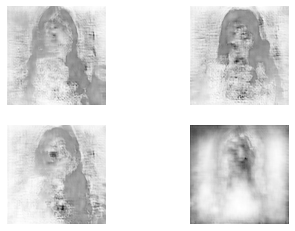

epoch:3751 d_loss:0.1996 g_loss:4.0196
epoch:3752 d_loss:0.1219 g_loss:6.4899
epoch:3753 d_loss:0.2666 g_loss:5.3014
epoch:3754 d_loss:0.1627 g_loss:3.8227
epoch:3755 d_loss:0.1993 g_loss:5.4072
epoch:3756 d_loss:0.0548 g_loss:7.8089
epoch:3757 d_loss:0.1754 g_loss:6.0608
epoch:3758 d_loss:0.1811 g_loss:4.4625
epoch:3759 d_loss:0.2600 g_loss:5.4164
epoch:3760 d_loss:0.2779 g_loss:5.4245
epoch:3761 d_loss:0.1537 g_loss:4.6555
epoch:3762 d_loss:0.1634 g_loss:4.2708
epoch:3763 d_loss:0.1049 g_loss:4.3617
epoch:3764 d_loss:0.0789 g_loss:4.8604
epoch:3765 d_loss:0.2565 g_loss:4.5882
epoch:3766 d_loss:0.2737 g_loss:4.5759
epoch:3767 d_loss:0.1930 g_loss:3.9324
epoch:3768 d_loss:0.1960 g_loss:4.0192
epoch:3769 d_loss:0.1004 g_loss:6.0269
epoch:3770 d_loss:0.1986 g_loss:4.3664
epoch:3771 d_loss:0.1779 g_loss:6.3255
epoch:3772 d_loss:0.0633 g_loss:7.9857
epoch:3773 d_loss:0.1147 g_loss:3.8918
epoch:3774 d_loss:0.2014 g_loss:6.0577
epoch:3775 d_loss:0.1365 g_loss:6.4726
epoch:3776 d_loss:0.1847 

<Figure size 720x576 with 0 Axes>

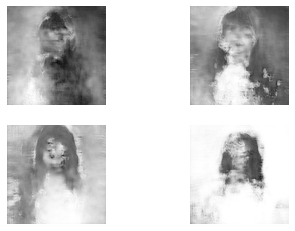

epoch:3801 d_loss:0.2347 g_loss:4.9443
epoch:3802 d_loss:0.0486 g_loss:8.8462
epoch:3803 d_loss:0.3132 g_loss:5.9423
epoch:3804 d_loss:0.1064 g_loss:3.5831
epoch:3805 d_loss:0.1697 g_loss:4.8479
epoch:3806 d_loss:0.0919 g_loss:6.5764
epoch:3807 d_loss:0.2149 g_loss:5.2021
epoch:3808 d_loss:0.2771 g_loss:4.4497
epoch:3809 d_loss:0.1385 g_loss:6.1782
epoch:3810 d_loss:0.2135 g_loss:4.4385
epoch:3811 d_loss:0.2279 g_loss:4.5051
epoch:3812 d_loss:0.1569 g_loss:5.0100
epoch:3813 d_loss:0.2463 g_loss:5.2432
epoch:3814 d_loss:0.3600 g_loss:3.7581
epoch:3815 d_loss:0.2552 g_loss:4.0921
epoch:3816 d_loss:0.1240 g_loss:4.9912
epoch:3817 d_loss:0.1460 g_loss:4.4731
epoch:3818 d_loss:0.3169 g_loss:3.5919
epoch:3819 d_loss:0.1344 g_loss:5.4314
epoch:3820 d_loss:0.2062 g_loss:4.4699
epoch:3821 d_loss:0.1516 g_loss:4.3476
epoch:3822 d_loss:0.1237 g_loss:5.3035
epoch:3823 d_loss:0.1544 g_loss:4.9842
epoch:3824 d_loss:0.2621 g_loss:3.3901
epoch:3825 d_loss:0.1733 g_loss:5.1124
epoch:3826 d_loss:0.1808 

<Figure size 720x576 with 0 Axes>

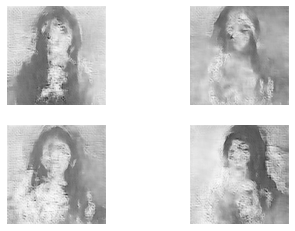

epoch:3851 d_loss:0.0582 g_loss:5.9383
epoch:3852 d_loss:0.0599 g_loss:6.8785
epoch:3853 d_loss:0.1177 g_loss:6.1161
epoch:3854 d_loss:0.1487 g_loss:4.9814
epoch:3855 d_loss:0.1340 g_loss:5.5917
epoch:3856 d_loss:0.0269 g_loss:7.1357
epoch:3857 d_loss:0.1619 g_loss:6.1968
epoch:3858 d_loss:0.1546 g_loss:3.5079
epoch:3859 d_loss:0.2845 g_loss:4.1529
epoch:3860 d_loss:0.1232 g_loss:5.2534
epoch:3861 d_loss:0.3632 g_loss:2.7718
epoch:3862 d_loss:0.3951 g_loss:3.9833
epoch:3863 d_loss:0.1155 g_loss:6.9943
epoch:3864 d_loss:0.3341 g_loss:4.7745
epoch:3865 d_loss:0.2385 g_loss:3.3320
epoch:3866 d_loss:0.1597 g_loss:5.3393
epoch:3867 d_loss:0.1516 g_loss:7.3934
epoch:3868 d_loss:0.3412 g_loss:4.1422
epoch:3869 d_loss:0.2048 g_loss:3.6482
epoch:3870 d_loss:0.1939 g_loss:5.3201
epoch:3871 d_loss:0.1215 g_loss:7.0319
epoch:3872 d_loss:0.1725 g_loss:4.8730
epoch:3873 d_loss:0.1126 g_loss:4.7232
epoch:3874 d_loss:0.0939 g_loss:4.9871
epoch:3875 d_loss:0.0796 g_loss:5.8199
epoch:3876 d_loss:0.1952 

<Figure size 720x576 with 0 Axes>

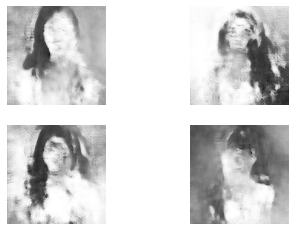

epoch:3901 d_loss:0.1791 g_loss:5.6340
epoch:3902 d_loss:0.1382 g_loss:4.4205
epoch:3903 d_loss:0.0522 g_loss:5.1014


In [ ]:
def gan_train(epoch, batch_size, saving_interval):
    
    #X_train = X_train.reshape(X_train.shape[0], 256, 256, 1).astype('float32')
    #X_train = (X_train - 127.5)/ 127.5
    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    
    for i in range(epoch):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        d_loss_real = discriminator.train_on_batch(imgs, true)
        
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        
        d_loss = 0.5*np.add(d_loss_real, d_loss_fake)
        g_loss = gan.train_on_batch(noise, true)
        
        print('epoch:%d' % i, 'd_loss:%.4f' % d_loss, 'g_loss:%.4f' % g_loss)
        
        if i % saving_interval == 0:
            noise = np.random.normal(0, 1, (25, 100))
            gen_imgs = generator.predict(noise)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
            plt.figure(figsize=(10,8))
            fig, axs = plt.subplots(2, 2)
            count = 0
            for j in range(2):
                for k in range(2):
                    axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                    axs[j, k].axis('off')
                    count += 1
                    fig.savefig('./drive/MyDrive/astest/arterm_sapience_%d.png' % i )
            plt.show()
                    
gan_train(10001, 100, 50)